# **Amazing International Airlines Inc. (AIAI)**

## **Context**

Amazing International Airlines Inc. (AIAI) is a global airline seeking to enhance its customer loyalty program through **data-driven personalization**.  
In an increasingly competitive aviation market, AIAI aims to leverage **advanced segmentation analytics** to design tailored services and marketing strategies for its diverse customer base.

Your task is to analyze **three years of loyalty and flight activity data** to uncover meaningful customer segments that can guide business decisions and strategic initiatives.  

The segmentation should integrate multiple analytical perspectives, including:

- **Value-based segmentation** — grouping customers by their economic contribution and loyalty value.  
- **Behavioral segmentation** — analyzing flight frequency, point redemption habits, and travel companions.  
- **Demographic segmentation** — considering personal attributes such as gender, income, education, and location to reveal distinctive travel profiles.  

Ultimately, the objective is to **combine these perspectives into a unified segmentation framework**, supporting AIAI in creating differentiated experiences and maximizing long-term customer value.


## **Expected Outcomes**

In this notebook, we will perform a comprehensive **Exploratory Data Analysis (EDA)** aligned with the CRISP-DM methodology, focusing on:

- Descriptive statistics and visualization of key variables.  
- Identification of data quality issues and potential biases.  
- Detection of trends, patterns, and anomalies across customer behaviors.  
- Development of engineered features that may enhance future clustering performance.  
- Clear communication of insights to support strategic decision-making.

## **Data Definition**

### Dataset 1: `DM_AIAI_CustomerDB.csv`

| **Variable** | **Description** |
|---------------|-----------------|
| Loyalty# | Unique customer identifier for loyalty program members |
| First Name | Customer’s first name |
| Last Name | Customer’s last name |
| Customer Name | Customer’s full name (concatenated) |
| Country | Customer’s country of residence |
| Province or State | Customer’s province or state |
| City | Customer’s city of residence |
| Latitude | Geographic latitude coordinate of customer location |
| Longitude | Geographic longitude coordinate of customer location |
| Postal code | Customer’s postal/ZIP code |
| Gender | Customer’s gender |
| Education | Customer’s highest education level |
| Location Code | Urban/Suburban/Rural classification of customer residence |
| Income | Customer’s annual income |
| Marital Status | Customer’s marital status |
| LoyaltyStatus | Current tier status in loyalty program (Star > Nova > Aurora) |
| EnrollmentDateOpening | Date when customer joined the loyalty program |
| CancellationDate | Date when customer left the program |
| Customer Lifetime Value | Total calculated monetary value of customer relationship |
| EnrollmentType | Method of joining loyalty program |





### Dataset 2: `DM_AIAI_FlightsDB.csv`

| **Variable** | **Description** |
|---------------|-----------------|
| Loyalty# | Unique customer identifier linking to CustomerDB |
| Year | Year of flight activity record |
| Month | Month of flight activity record (1–12) |
| YearMonthDate | First day of the month for the activity period |
| NumFlights | Total number of flights taken by customer in the month |
| NumFlightsWithCompanions | Number of flights where customer traveled with companions |
| DistanceKM | Total distance traveled in kilometers for the month |
| PointsAccumulated | Loyalty points earned by customer during the month |
| PointsRedeemed | Loyalty points spent/redeemed by customer during the month |
| DollarCostPointsRedeemed | Dollar value of points redeemed during the month |



### **Methodological Note**

This segmentation initiative originates from a **pedagogical impetus embedded in data-centric inquiry**, aligning technical exploration with **business-oriented insight generation**.  
All analyses are conducted under the **CRISP-DM framework**, progressing from Business Understanding and Data Understanding toward Modeling and Evaluation.

---

This section imports the essential Python libraries and defines reusable functions that will support the exploratory data analysis (EDA) process for the **Amazing International Airlines Inc. (AIAI)** segmentation project.  
All functions are designed for clarity, reproducibility, and consistency across the analysis workflow.

# **Libraries and Functions**

# Import Packages and read files

In [26]:
#%load_ext nb_black

# Library to suppress warnings or deprecation notes
!pip install scikit-learn
!pip install geopy
!pip install folium
!pip install pdfkit
!pip install geopandas

import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np
import os

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.impute import KNNImputer
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage
from geopy.geocoders import Nominatim
from geopy.distance import geodesic
from sklearn.manifold import TSNE

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
import math
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder
import datetime
from sklearn.impute import KNNImputer
import plotly.express as px
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from scipy import stats
import matplotlib.cm as cm
from sklearn import metrics
from sklearn.metrics import make_scorer, silhouette_score, silhouette_samples, davies_bouldin_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram
from sklearn.model_selection import GridSearchCV

## **Functions**

### Files to be loaded:
- `DM_AIAI_CustomerDB.csv` — customer-level information from the loyalty program  
- `DM_AIAI_FlightsDB.csv` — monthly flight activity data linked via the `Loyalty#` key  

### Objective:
Load both datasets from the local working directory into pandas DataFrames for subsequent cleaning, exploration, and feature engineering.


In [65]:
# Detect if colab environment and if colab then mount drive
if 'google.colab' in str(get_ipython()):
    from google.colab import drive
    drive.mount('/content/drive')
    os.chdir('/content/drive/Othercomputers/My laptop/202526_novaims/dm/project')
    print(os.getcwd())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/Othercomputers/My laptop/202526_novaims/dm/project


In [66]:
FlightsDB = pd.read_csv('data/DM_AIAI_FlightsDB.csv', sep = ',')
CustomerDB = pd.read_csv('data/DM_AIAI_CustomerDB.csv', sep = ',')

# Initial Inspection

In [67]:
CustomerDB.head()

,Unnamed: 0,Loyalty#,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,...,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType
0,0,480934,Cecilia,Householder,Cecilia Householder,Canada,Ontario,Toronto,43.653225,-79.383186,...,female,Bachelor,Urban,70146.0,Married,Star,2/15/2019,NaN,3839.14,Standard
1,1,549612,Dayle,Menez,Dayle Menez,Canada,Alberta,Edmonton,53.544388,-113.490930,...,male,College,Rural,0.0,Divorced,Star,3/9/2019,NaN,3839.61,Standard
2,2,429460,Necole,Hannon,Necole Hannon,Canada,British Columbia,Vancouver,49.282730,-123.120740,...,male,College,Urban,0.0,Single,Star,7/14/2017,1/8/2021,3839.75,Standard
3,3,608370,Queen,Hagee,Queen Hagee,Canada,Ontario,Toronto,43.653225,-79.383186,...,male,College,Suburban,0.0,Single,Star,2/17/2016,NaN,3839.75,Standard
4,4,530508,Claire,Latting,Claire Latting,Canada,Quebec,Hull,45.428730,-75.713364,...,male,Bachelor,Suburban,97832.0,Married,Star,10/25/2017,NaN,3842.79,2021 Promotion


In [68]:
FlightsDB.head()

,Loyalty#,Year,Month,YearMonthDate,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed
0,413052,2021,12,12/1/2021,2.0,2.0,9384.0,938.0,0.0,0.0
1,464105,2021,12,12/1/2021,0.0,0.0,0.0,0.0,0.0,0.0
2,681785,2021,12,12/1/2021,10.0,3.0,14745.0,1474.0,0.0,0.0
3,185013,2021,12,12/1/2021,16.0,4.0,26311.0,2631.0,3213.0,32.0
4,216596,2021,12,12/1/2021,9.0,0.0,19275.0,1927.0,0.0,0.0


In [69]:
CustomerDB = CustomerDB.copy()
CustomerDB = CustomerDB.drop(columns=['Unnamed: 0'])
CustomerDB.tail()

,Loyalty#,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,Postal code,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType
16916,100012,Ethan,Thompson,Ethan Thompson,Canada,Quebec,Quebec City,46.759733,-71.141009,Y0C 7D6,male,Bachelor,Suburban,NaN,Single,Star,2/27/2019,2/27/2019,NaN,Standard
16917,100013,Layla,Young,Layla Young,Canada,Alberta,Edmonton,53.524829,-113.546357,L3S 9Y3,female,Bachelor,Rural,NaN,Married,Star,9/20/2017,9/20/2017,NaN,Standard
16918,100014,Amelia,Bennett,Amelia Bennett,Canada,New Brunswick,Moncton,46.051866,-64.825428,G2S 2B6,male,Bachelor,Rural,NaN,Married,Star,11/28/2020,11/28/2020,NaN,Standard
16919,100015,Benjamin,Wilson,Benjamin Wilson,Canada,Quebec,Quebec City,46.862970,-71.133444,B1Z 8T3,female,College,Urban,NaN,Married,Star,4/9/2020,4/9/2020,NaN,Standard
16920,100016,Emma,Martin,Emma Martin,Canada,British Columbia,Dawson Creek,55.720562,-120.160090,M4A 1E4,female,Master,Suburban,NaN,Single,Star,7/21/2020,7/21/2020,NaN,Standard


In [70]:
FlightsDB.tail()

,Loyalty#,Year,Month,YearMonthDate,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed
608431,999902,2019,12,12/1/2019,7.2,0.0,30766.5,3076.65,0.0,0.0
608432,999911,2019,12,12/1/2019,0.0,0.0,0.0,0.00,0.0,0.0
608433,999940,2019,12,12/1/2019,14.4,0.9,18261.0,1826.10,0.0,0.0
608434,999982,2019,12,12/1/2019,0.0,0.0,0.0,0.00,0.0,0.0
608435,999986,2019,12,12/1/2019,0.0,0.0,0.0,0.00,0.0,0.0


In [71]:
print(CustomerDB.columns)

print(f"Customer dataset: {CustomerDB.shape[0]} rows × {CustomerDB.shape[1]} columns")


Index(['Loyalty#', 'First Name', 'Last Name', 'Customer Name', 'Country',
       'Province or State', 'City', 'Latitude', 'Longitude', 'Postal code',
       'Gender', 'Education', 'Location Code', 'Income', 'Marital Status',
       'LoyaltyStatus', 'EnrollmentDateOpening', 'CancellationDate',
       'Customer Lifetime Value', 'EnrollmentType'],
      dtype='object')
Customer dataset: 16921 rows × 20 columns


In [72]:
print(FlightsDB.columns)

print(f"Flights dataset:  {FlightsDB.shape[0]} rows × {FlightsDB.shape[1]} columns")


Index(['Loyalty#', 'Year', 'Month', 'YearMonthDate', 'NumFlights',
       'NumFlightsWithCompanions', 'DistanceKM', 'PointsAccumulated',
       'PointsRedeemed', 'DollarCostPointsRedeemed'],
      dtype='object')
Flights dataset:  608436 rows × 10 columns


# **Exploratory Data Analysis**

This section focuses on the **Data Understanding** phase of the CRISP-DM framework.  
We explore the structure, completeness, and consistency of both datasets — `CustomerDB` and `FlightsDB` — to assess their readiness for clustering and feature engineering.


## Dataframe structure and datatypes

In this section, we inspect the structure and data types of the two AIAI datasets:  
- `CustomerDB`: loyalty program and demographic information.  
- `FlightsDB`: monthly flight activity data.

This step helps us confirm that the data was imported correctly, identify column types, and detect potential inconsistencies (e.g., numeric fields stored as objects).

In [73]:
print("=== Customer Dataset Info ===")
CustomerDB.info()

=== Customer Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16921 entries, 0 to 16920
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loyalty#                 16921 non-null  int64  
 1   First Name               16921 non-null  object 
 2   Last Name                16921 non-null  object 
 3   Customer Name            16921 non-null  object 
 4   Country                  16921 non-null  object 
 5   Province or State        16921 non-null  object 
 6   City                     16921 non-null  object 
 7   Latitude                 16921 non-null  float64
 8   Longitude                16921 non-null  float64
 9   Postal code              16921 non-null  object 
 10  Gender                   16921 non-null  object 
 11  Education                16921 non-null  object 
 12  Location Code            16921 non-null  object 
 13  Income                   16901 non-null  float

From the dataset, we can conclude the following:
- **'Income'** and **'Customer Lifetime Value'** have exactly the same missing values, suggesting that these two variables are likely related.
- **CancellationDate** has a low number of missing values (2310) showing that but the majority of customers are still active (86%).
- **EnrollmentDateOpening** and **CancellationDate** should be convert to DateTime

In [75]:
print("\n=== Flights Dataset Info ===")
FlightsDB.info()


=== Flights Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608436 entries, 0 to 608435
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Loyalty#                  608436 non-null  int64  
 1   Year                      608436 non-null  int64  
 2   Month                     608436 non-null  int64  
 3   YearMonthDate             608436 non-null  object 
 4   NumFlights                608436 non-null  float64
 5   NumFlightsWithCompanions  608436 non-null  float64
 6   DistanceKM                608436 non-null  float64
 7   PointsAccumulated         608436 non-null  float64
 8   PointsRedeemed            608436 non-null  float64
 9   DollarCostPointsRedeemed  608436 non-null  float64
dtypes: float64(6), int64(3), object(1)
memory usage: 46.4+ MB


From the dataset, we can conclude the following:

- No missing values

- **YearMonthDate** should be converted to datetime

- **NumFlights**, **NumFlightsWithCompanions**, **PointsAccumulated** and **PointsRedeemed** should be converted to integer

In [76]:
CustomerDB.dtypes

,0
Loyalty#,int64
First Name,object
Last Name,object
Customer Name,object
Country,object
Province or State,object
City,object
Latitude,float64
Longitude,float64
Postal code,object


The types of the following features in CustomerDB should be:
- **'EnrollmentDateOpening'**: datetime64
- **'CancellationDate'**: datetime64

This will be addressed in the Data Types section to ensure proper handling for filtering, comparison, and time-based analysis.


In [77]:
FlightsDB.dtypes

,0
Loyalty#,int64
Year,int64
Month,int64
YearMonthDate,object
NumFlights,float64
NumFlightsWithCompanions,float64
DistanceKM,float64
PointsAccumulated,float64
PointsRedeemed,float64
DollarCostPointsRedeemed,float64


The types of the following features in FlightsDB should be:
- **'NumFlights'**: int64
- **'NumFlightswithCompanions'**: int64
- **'PointsAccumulated'**: int64
- **'PointsRedeemed'**: int64

In [78]:
CustomerDB.nunique()

,0
Loyalty#,16757
First Name,4941
Last Name,15404
Customer Name,16921
Country,1
Province or State,11
City,29
Latitude,49
Longitude,49
Postal code,75


The feature **Country** contains only a single unique value, meaning it provides no meaningful information for analysis. Therefore, it is recommended to drop this feature.

The features **EnrollmentType** and **Gender** each have only two unique categories. Since they are binary, we can transform them into boolean variables for easier analysis and modeling.

In [79]:
FlightsDB.nunique()

,0
Loyalty#,16737
Year,3
Month,12
YearMonthDate,36
NumFlights,41
NumFlightsWithCompanions,22
DistanceKM,66762
PointsAccumulated,37064
PointsRedeemed,8146
DollarCostPointsRedeemed,104


# Descriptive Statistics

## CustomerDB

In [80]:
CustomerDB.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Loyalty#,16921.0,NaN,NaN,NaN,550197.393771,259251.503597,100011.0,326823.0,550896.0,772438.0,999999.0
First Name,16921,4941,Stacey,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Last Name,16921,15404,Salberg,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer Name,16921,16921,Emma Martin,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,16921,1,Canada,16921,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Province or State,16921,11,Ontario,5468,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,16921,29,Toronto,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Latitude,16921.0,NaN,NaN,NaN,47.1745,3.307971,42.984924,44.231171,46.087818,49.28273,60.721188
Longitude,16921.0,NaN,NaN,NaN,-91.814768,22.242429,-135.05684,-120.23766,-79.383186,-74.596184,-52.712578
Postal code,16921,75,V6E 3D9,917,NaN,NaN,NaN,NaN,NaN,NaN,NaN


All customers are located in Canada; the most common province is Ontario and the most common city is Toronto. The Province or State we could encode as one-hot for modeling.

The **"Income"** field has a mean of about 37,758, with a wide range (0 to 99,981), so it means that each customer, in average receives a income of 37k per year.

**Customer Lifetime Value** also shows significant variability, highlighting a broad spectrum of customer worth.

**Loyalty Status** has three categories, with "Star" being the most common.

Most accounts were opened with the "Standard" enrollment type. We see that we clearly don't have a fairly balanced category, so we may drop it. Let's see if this category has a significant relationship with the other features.

There are many more enrollments than cancellations, suggesting most customers remain active.

**First Name**, **Last Name** and **Customer Name** does not seems to have significant relevance, so we will drop them.

Encode **Province**, **City**, **Education**, **LoyaltyStatus** with one-hot or ordinal encoding.


## FlightsDB

In [81]:
FlightsDB.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty#,608436.0,550037.873084,258935.180575,100018.0,326961.00,550834.000,772194.0000,999986.0
Year,608436.0,2020.000000,0.816497,2019.0,2019.00,2020.000,2021.0000,2021.0
Month,608436.0,6.500000,3.452055,1.0,3.75,6.500,9.2500,12.0
NumFlights,608436.0,3.908107,5.057889,0.0,0.00,0.000,7.2000,21.0
NumFlightsWithCompanions,608436.0,0.983944,2.003785,0.0,0.00,0.000,0.9000,11.0
DistanceKM,608436.0,7939.341419,10260.421873,0.0,0.00,856.400,15338.1750,42040.0
PointsAccumulated,608436.0,793.777781,1025.918521,0.0,0.00,85.275,1533.7125,4204.0
PointsRedeemed,608436.0,235.251678,983.233374,0.0,0.00,0.000,0.0000,7496.0
DollarCostPointsRedeemed,608436.0,2.324835,9.725168,0.0,0.00,0.000,0.0000,74.0


In [82]:
FlightsDB = FlightsDB.copy()

agg_by_customer = FlightsDB.groupby('Loyalty#')[['NumFlights', 'NumFlightsWithCompanions',
                                                 'DistanceKM', 'PointsAccumulated', 'PointsRedeemed', 'DollarCostPointsRedeemed']].mean().reset_index()
agg_by_customer.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty#,16737.0,549735.880445,258912.132453,100018.0,326603.000000,550434.000000,772019.000000,999986.000000
NumFlights,16737.0,3.917364,2.240442,0.0,1.944444,4.516667,5.636111,9.677778
NumFlightsWithCompanions,16737.0,0.986079,0.650682,0.0,0.436111,1.019444,1.461111,3.444444
DistanceKM,16737.0,7956.482846,4546.290236,0.0,3970.388889,9196.005556,11469.319444,19798.044444
PointsAccumulated,16737.0,795.491577,454.552857,0.0,396.944444,919.370000,1146.718056,1979.568333
PointsRedeemed,16737.0,235.857617,241.082095,0.0,0.000000,179.972222,375.386111,1597.994444
DollarCostPointsRedeemed,16737.0,2.330821,2.384114,0.0,0.000000,1.777778,3.705556,15.888889


# Missing Values

## CustomerDB

In [83]:
CustomerDB.isna().sum()

,0
Loyalty#,0
First Name,0
Last Name,0
Customer Name,0
Country,0
Province or State,0
City,0
Latitude,0
Longitude,0
Postal code,0


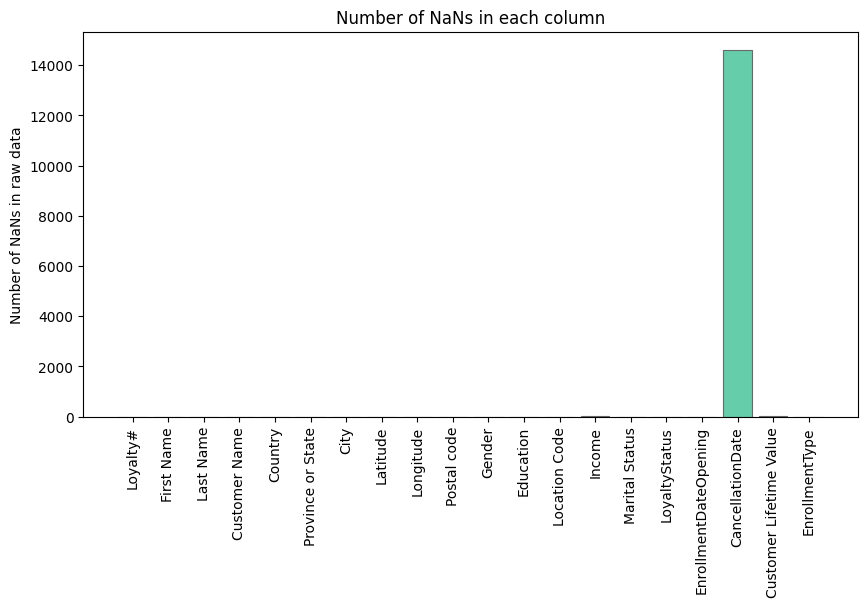

In [84]:
CustomerDB = CustomerDB.copy()
number_of_nans = CustomerDB.isnull().sum()
x_xis = number_of_nans.index.tolist()
plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
plt.ylabel('Number of NaNs in raw data')
plt.title('Number of NaNs in each column')
plt.bar(x=x_xis, height=number_of_nans, color='mediumaquamarine', edgecolor='dimgray', linewidth=0.8)

plt.show()

In [85]:
# Total rows
total_rows = CustomerDB.shape[0]

# Count of NaNs per column
nan_count = CustomerDB.isna().sum()

# Percentage of NaNs per column
nan_percentage = (nan_count / total_rows) * 100

# Display
nan_percentage


,0
Loyalty#,0.000000
First Name,0.000000
Last Name,0.000000
Customer Name,0.000000
Country,0.000000
Province or State,0.000000
City,0.000000
Latitude,0.000000
Longitude,0.000000
Postal code,0.000000


The variable CancellationDate contains approximately 86% missing values. This is expected, as missing entries correspond to active loyalty members who have not left the program. Only around 14% of customers show a valid cancellation date, indicating a relatively low churn rate across all loyalty tiers (Aurora, Nova, Star).

In [86]:
FlightsDB.isnull().sum()

,0
Loyalty#,0
Year,0
Month,0
YearMonthDate,0
NumFlights,0
NumFlightsWithCompanions,0
DistanceKM,0
PointsAccumulated,0
PointsRedeemed,0
DollarCostPointsRedeemed,0


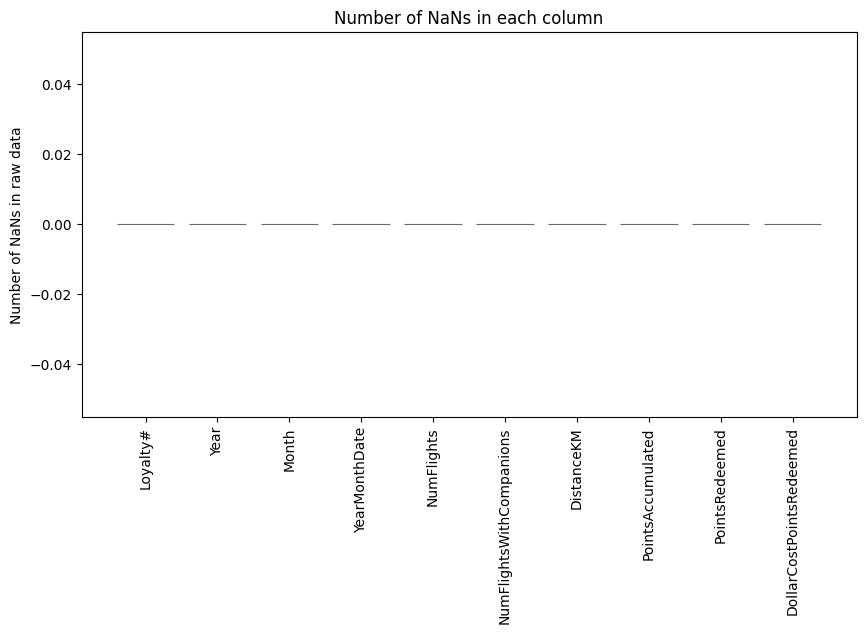

In [87]:
FlightsDB = FlightsDB.copy()

number_of_nans = FlightsDB.isnull().sum()
x_xis = number_of_nans.index.tolist()
plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
plt.ylabel('Number of NaNs in raw data')
plt.title('Number of NaNs in each column')
plt.bar(x=x_xis, height=number_of_nans, color='mediumaquamarine', edgecolor='dimgray', linewidth=0.8)

plt.show()

### Missing Values in CustomerDB

#### Cancellation Date



In [88]:
# Create new feature Cancelled (Y/N): if CancellationDate is null then Cancelled is "N" else "Y"
CustomerDB['Cancelled'] = np.where(CustomerDB['CancellationDate'].isna(), 'N', 'Y')

In [99]:
# create new feature called Time on Program which is the time between EnrollmentDateOpening and  CancellationDate.
# if CancellationDate is not null the compute the difference between EnrollmentDateOpening and CancellationDate
# if CancellationDate is null assume the current date is the max date of EnrollmentDateOpening
max_date = CustomerDB['EnrollmentDateOpening'].max()
CustomerDB['Time on Program'] = np.where(CustomerDB['CancellationDate'].isna(), max_date  - CustomerDB['EnrollmentDateOpening'], CustomerDB['CancellationDate'] - CustomerDB['EnrollmentDateOpening'])

In [100]:
CustomerDB.head()

,Loyalty#,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,Postal code,...,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType,Cancelled,Time on Program
0,480934,Cecilia,Householder,Cecilia Householder,Canada,Ontario,Toronto,43.653225,-79.383186,M2Z 4K1,...,Urban,70146.0,Married,Star,2019-02-15,NaT,3839.14,Standard,N,1049 days
1,549612,Dayle,Menez,Dayle Menez,Canada,Alberta,Edmonton,53.544388,-113.490930,T3G 6Y6,...,Rural,0.0,Divorced,Star,2019-03-09,NaT,3839.61,Standard,N,1027 days
2,429460,Necole,Hannon,Necole Hannon,Canada,British Columbia,Vancouver,49.282730,-123.120740,V6E 3D9,...,Urban,0.0,Single,Star,2017-07-14,2021-01-08,3839.75,Standard,Y,1274 days
3,608370,Queen,Hagee,Queen Hagee,Canada,Ontario,Toronto,43.653225,-79.383186,P1W 1K4,...,Suburban,0.0,Single,Star,2016-02-17,NaT,3839.75,Standard,N,2143 days
4,530508,Claire,Latting,Claire Latting,Canada,Quebec,Hull,45.428730,-75.713364,J8Y 3Z5,...,Suburban,97832.0,Married,Star,2017-10-25,NaT,3842.79,2021 Promotion,N,1527 days


We created features to:
- Identify active clients
- Compute the time that a client is on the loyoalty program

#### Income

In [101]:
# Filter rows where Income is missing
income_nan_df = CustomerDB[CustomerDB['Income'].isna()]

# Show how many customers have missing income
print(f"Total customers with missing Income: {income_nan_df.shape[0]}")

income_nan_df.head(20)

Total customers with missing Income: 20


,Loyalty#,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,Postal code,...,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType,Cancelled,Time on Program
16901,999987,Layla,Murphy,Layla Murphy,Canada,New Brunswick,Fredericton,46.029263,-66.565150,R4H 2Y2,...,Urban,NaN,Single,Star,2017-03-07,2017-03-07,NaN,Standard,Y,0 days
16902,999988,Jana,Parker,Jana Parker,Canada,Quebec,Montreal,45.573672,-73.523012,N6B 1N3,...,Rural,NaN,Single,Star,2017-08-22,2017-08-22,NaN,Standard,Y,0 days
16903,999989,Ethan,Parker,Ethan Parker,Canada,Ontario,Trenton,44.075379,-77.550375,P8F 5C8,...,Rural,NaN,Married,Star,2015-09-12,2015-09-12,NaN,Standard,Y,0 days
16904,999990,Ryan,Anderson,Ryan Anderson,Canada,New Brunswick,Moncton,46.106617,-64.714267,B6P 6D0,...,Rural,NaN,Married,Star,2019-06-10,2019-06-10,NaN,Standard,Y,0 days
16905,999991,Olivia,Cote,Olivia Cote,Canada,New Brunswick,Fredericton,45.950000,-66.652437,X3W 5N2,...,Suburban,NaN,Married,Star,2019-07-20,2019-07-20,NaN,Standard,Y,0 days
16906,999992,Ella,Roy,Ella Roy,Canada,Ontario,Toronto,43.706878,-79.437412,P6D 6N2,...,Suburban,NaN,Single,Star,2021-03-27,2021-03-27,NaN,Standard,Y,0 days
16907,999993,Elijah,Cook,Elijah Cook,Canada,British Columbia,Dawson Creek,55.701475,-120.181716,W6H 0Z7,...,Suburban,NaN,Married,Star,2015-01-27,2015-01-27,NaN,Standard,Y,0 days
16908,999994,Ethan,Chan,Ethan Chan,Canada,Ontario,Ottawa,45.365906,-75.723181,B2F 3E1,...,Rural,NaN,Married,Star,2016-05-05,2016-05-05,NaN,Standard,Y,0 days
16909,999995,Liam,Wong,Liam Wong,Canada,Ontario,Ottawa,45.471557,-75.704868,B3A 2R0,...,Suburban,NaN,Married,Star,2020-03-02,2020-03-02,NaN,Standard,Y,0 days
16910,999996,Isabella,Ross,Isabella Ross,Canada,Ontario,Toronto,43.690489,-79.436758,B4W 4M6,...,Suburban,NaN,Single,Star,2018-09-14,2018-09-14,NaN,Standard,Y,0 days


In [102]:
CustomerDB['Income'] = pd.to_numeric(CustomerDB['Income'], errors='coerce')

n_total = len(CustomerDB)
n_nan   = CustomerDB['Income'].isna().sum()
n_zero  = (CustomerDB['Income'] == 0).sum()

print(f"Total rows: {n_total}")
print(f"NaN Income: {n_nan}  ({n_nan/n_total:.2%})")
print(f"Zero Income: {n_zero}  ({n_zero/n_total:.2%})")

valid = n_total - n_nan
if valid > 0:
    print(f"Zero among valid (non-NaN): {n_zero}  ({n_zero/valid:.2%})")

ct_tier = pd.crosstab(CustomerDB['LoyaltyStatus'], CustomerDB['Income'].eq(0))
ct_tier.columns = ['Income!=0', 'Income==0']
display(ct_tier)
display((ct_tier.div(ct_tier.sum(axis=1), axis=0) * 100).round(2))  # percentagens por tier

negatives = (CustomerDB['Income'] < 0).sum()
print(f"Negative incomes: {negatives}")


Total rows: 16921
NaN Income: 20  (0.12%)
Zero Income: 4273  (25.25%)
Zero among valid (non-NaN): 4273  (25.28%)


,Income!=0,Income==0
LoyaltyStatus,,
Aurora,2643,795
Nova,4377,1345
Star,5628,2133


,Income!=0,Income==0
LoyaltyStatus,,
Aurora,76.88,23.12
Nova,76.49,23.51
Star,72.52,27.48


Negative incomes: 0


All of the 20 customers with Income equals to nan have the same date for Cancellation and Enrollment, which suggers that the customer signed up and canceled on the same day.

The **Income** is missing, so the system likely never collected profile data for these customers because they did not complete or activate their account.

The same for **Customer Lifetime Value**, since the customers never activate their accounts, the CLV will be equal to missing value.

#### CLV

In [103]:
# Filter rows where CLV is missing
clv_missing_df = CustomerDB[CustomerDB['Customer Lifetime Value'].isna()]

# Count how many
total_clv_missing = clv_missing_df.shape[0]
print(f"Total customers with missing CLV: {total_clv_missing}")


Total customers with missing CLV: 20


Here we are comparing this 20 rows in FlightsDB

In [104]:
CustomerDB['Loyalty#'] = CustomerDB['Loyalty#'].astype(str).str.strip()
FlightsDB['Loyalty#']  = FlightsDB['Loyalty#'].astype(str).str.strip()

customers_na = CustomerDB[(CustomerDB['Income'].isna()) & (CustomerDB['Customer Lifetime Value'].isna())]

ids_na = customers_na['Loyalty#'].tolist()

flights_match = FlightsDB[FlightsDB['Loyalty#'].isin(ids_na)]

print(flights_match)

Empty DataFrame
Columns: [Loyalty#, Year, Month, YearMonthDate, NumFlights, NumFlightsWithCompanions, DistanceKM, PointsAccumulated, PointsRedeemed, DollarCostPointsRedeemed]
Index: []


In [105]:
# Replace NaN incomes and customer lifetime value with 0
CustomerDB = CustomerDB.copy()
CustomerDB['Income'] = CustomerDB['Income'].fillna(0)
CustomerDB['Customer Lifetime Value'] = CustomerDB['Customer Lifetime Value'].fillna(0)

#### What we analysed & why CLV=0 and Income=0 for those 20 cases

**What we checked**
- We normalized the join key `Loyalty#` and performed an **anti-join** to find customers who are present in the CustomerDB but have **no rows** in the FlightsDB.
- For those customers, we verified that there is **no flight activity** at all (no flights, distance, points accumulated or redeemed, nor dollar redemptions).

**Findings**
- We identified **Star-tier customers** who **enrolled and later cancelled** (based on `EnrollmentDateOpening` and `CancellationDate`) **without any recorded flight activity** during the observation window.
- Because CLV in this dataset is operationally tied to loyalty activity (points accumulated/redeemed and their dollar value), these customers have **no observable contribution** to CLV.

**Decision & rationale**
- We set `Customer Lifetime Value = 0` and `Income = 0` **only** for customers with **CLV missing** *and* **no flight activity**.
- This is a **transparent, conservative, and business-consistent** treatment: no activity → no realized (or observable) value.
- We deliberately avoided imputing a positive value (e.g., tier/country median) because that would fabricate value not supported by behavior, potentially biasing segmentation and KPIs.

**Notes**
- If a different business rule is preferred (e.g., imputing a peer median for reporting comparability), keep a flag and document it clearly as **imputed** rather than observed.
- All other customers retain their original Income and CLV values.


# Data Types
## CustomerDB
We should change the data types of the following features to datetime:

- **EnrollmentDateOpening**

- **CancellationDate**


Discuss if we change now or after

In [106]:
CustomerDB = CustomerDB.copy()
CustomerDB['EnrollmentDateOpening']= pd.to_datetime(CustomerDB['EnrollmentDateOpening'], errors='coerce')
CustomerDB['CancellationDate']= pd.to_datetime(CustomerDB['CancellationDate'], errors='coerce')

CustomerDB.head()

,Loyalty#,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,Postal code,...,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType,Cancelled,Time on Program
0,480934,Cecilia,Householder,Cecilia Householder,Canada,Ontario,Toronto,43.653225,-79.383186,M2Z 4K1,...,Urban,70146.0,Married,Star,2019-02-15,NaT,3839.14,Standard,N,1049 days
1,549612,Dayle,Menez,Dayle Menez,Canada,Alberta,Edmonton,53.544388,-113.490930,T3G 6Y6,...,Rural,0.0,Divorced,Star,2019-03-09,NaT,3839.61,Standard,N,1027 days
2,429460,Necole,Hannon,Necole Hannon,Canada,British Columbia,Vancouver,49.282730,-123.120740,V6E 3D9,...,Urban,0.0,Single,Star,2017-07-14,2021-01-08,3839.75,Standard,Y,1274 days
3,608370,Queen,Hagee,Queen Hagee,Canada,Ontario,Toronto,43.653225,-79.383186,P1W 1K4,...,Suburban,0.0,Single,Star,2016-02-17,NaT,3839.75,Standard,N,2143 days
4,530508,Claire,Latting,Claire Latting,Canada,Quebec,Hull,45.428730,-75.713364,J8Y 3Z5,...,Suburban,97832.0,Married,Star,2017-10-25,NaT,3842.79,2021 Promotion,N,1527 days


## FlightsDB

We should change the data types of the following features:
- **NumFlights**: to int
- **NumFlightsWithCompanions**: to int
- **PointsAccumulated**: to int
- **PointsRedeemed**: to int
- **YearMonthDatr**: to datetime

In [107]:
# List of columns to convert
int_columns = ['NumFlights', 'NumFlightsWithCompanions', 'PointsAccumulated', 'PointsRedeemed']

# Convert each column to integer, using 'Int64' for nullable integers
for col in int_columns:
    FlightsDB[col] = pd.to_numeric(FlightsDB[col], errors='coerce').astype('int64')

# Convert both columns to datetime
FlightsDB['YearMonthDate'] = pd.to_datetime(
    FlightsDB['YearMonthDate'], errors='coerce'
)


# Duplicated values in the Primary Key and in all Dataset
## CustomerDB


In [108]:
# Select all fully duplicate rows (all columns must match)
fully_duplicated_rows = CustomerDB[CustomerDB.duplicated(keep=False)]

# Display the fully duplicated rows
fully_duplicated_rows

,Loyalty#,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,Postal code,...,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType,Cancelled,Time on Program


In [109]:
# Select all columns except 'Loyalty#'
cols_except_loyalty = [c for c in CustomerDB.columns if c != 'Loyalty#']

# Find duplicated rows ignoring 'Loyalty#'
duplicates_ignore_loyalty = CustomerDB[CustomerDB.duplicated(subset=cols_except_loyalty, keep=False)]

# Optional: sort for easier inspection
duplicates_ignore_loyalty = duplicates_ignore_loyalty.sort_values(by=['First Name','Last Name','EnrollmentDateOpening'])

# Display
duplicates_ignore_loyalty


,Loyalty#,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,Postal code,...,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType,Cancelled,Time on Program


By the shape of the dataset, the primary key should be **Loyalty#**

In [110]:
primary_key = 'Loyalty#'
unique_values = CustomerDB[primary_key].unique().shape
n_rows = CustomerDB[primary_key].shape [0]
if unique_values != n_rows:
    print('oh no! there are repetitions!')
else:
    print("all good! no repetitions!")

oh no! there are repetitions!


In [111]:
# Select all rows with duplicated Loyalty#
duplicated_loyalty = CustomerDB[CustomerDB['Loyalty#'].duplicated(keep=False)]

# Sort by Loyalty# and EnrollmentDateOpening
duplicated_loyalty_sorted = duplicated_loyalty.sort_values(by=['Loyalty#', 'EnrollmentDateOpening'])

# Display the result
duplicated_loyalty_sorted

,Loyalty#,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,Postal code,...,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType,Cancelled,Time on Program
1646,101902,Hans,Schlottmann,Hans Schlottmann,Canada,Ontario,London,42.984924,-81.245277,M5B 3E4,...,Rural,0.0,Married,Aurora,2020-01-07,NaT,6265.34,Standard,N,723 days
2668,101902,Yi,Nesti,Yi Nesti,Canada,Ontario,Toronto,43.653225,-79.383186,M8Y 4K8,...,Urban,79090.0,Married,Aurora,2020-03-19,NaT,8609.16,Standard,N,651 days
15988,106001,Maudie,Hyland,Maudie Hyland,Canada,New Brunswick,Fredericton,45.963589,-66.643112,E3B 2H2,...,Suburban,14973.0,Divorced,Star,2015-07-16,NaT,12168.74,Standard,N,2359 days
700,106001,Ivette,Peifer,Ivette Peifer,Canada,Quebec,Montreal,45.501690,-73.567253,H2Y 4R4,...,Suburban,10037.0,Single,Star,2016-01-11,NaT,4914.04,Standard,N,2180 days
9413,106509,Ardelia,Whitehorse,Ardelia Whitehorse,Canada,Ontario,Toronto,43.653225,-79.383186,M8Y 4K8,...,Rural,30915.0,Married,Nova,2020-04-25,2021-10-07,16727.77,Standard,Y,530 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,989528,Sharri,Boughman,Sharri Boughman,Canada,Quebec,Montreal,45.501690,-73.567253,H2T 2J6,...,Rural,0.0,Divorced,Nova,2020-05-01,NaT,3370.07,Standard,N,608 days
9890,990512,Magda,Sopher,Magda Sopher,Canada,Ontario,Toronto,43.653225,-79.383186,P1W 1K4,...,Suburban,0.0,Single,Star,2018-10-21,NaT,1904.00,Standard,N,1166 days
14478,990512,Ione,Snowden,Ione Snowden,Canada,British Columbia,Vancouver,49.282730,-123.120740,V5R 1W3,...,Urban,0.0,Single,Star,2021-08-20,NaT,6870.61,Standard,N,132 days
6981,992168,Frederick,Samaha,Frederick Samaha,Canada,Ontario,Toronto,43.653225,-79.383186,P1J 8T7,...,Suburban,22906.0,Married,Nova,2015-09-26,NaT,5746.33,Standard,N,2287 days


In [115]:
# Find duplicated combinations
duplicates = CustomerDB.groupby(['Loyalty#', 'EnrollmentDateOpening']).size().reset_index(name='count')
duplicates = duplicates[duplicates['count'] > 1]

print("Duplicated combinations:")
print(duplicates)

Duplicated combinations:
Empty DataFrame
Columns: [Loyalty#, EnrollmentDateOpening, count]
Index: []


In [116]:
# Count occurrences of each Loyalty#
loyalty_counts = CustomerDB['Loyalty#'].value_counts()

# Filter Loyalty# that appear more than 3 times
loyalty_repeated = loyalty_counts[loyalty_counts > 3]

print("Loyalty# appearing more than 3 times:")
print(loyalty_repeated)

Loyalty# appearing more than 3 times:
Series([], Name: count, dtype: int64)


In [117]:
CustomerDB = CustomerDB.copy()

num_removed = len(duplicated_loyalty)
print(f"Rowws that will be removed: {num_removed}")

duplicated_loyalty_list = duplicated_loyalty['Loyalty#'].tolist()  # se for DataFrame


CustomerDB = CustomerDB[~CustomerDB['Loyalty#'].isin(duplicated_loyalty_list)]


Rowws that will be removed: 327


In [118]:
duplicated_loyalty_filtered = duplicated_loyalty[duplicated_loyalty['CancellationDate'].isna()]
duplicated_loyalty_filtered.to_csv('duplicated_loyalty_filtered.csv')


In [119]:
merged_duplicated_flights = pd.merge(
    duplicated_loyalty_filtered,
    FlightsDB,
    how='inner',
    on='Loyalty#'
)

merged_duplicated_flights.to_csv('merged_duplicated_flights.csv', index=False)


#### What we analysed in duplicated rows

**Findings**
- We identified rows in CustomerDB with the same **Loyalty#** but different values in the other features.
- The maximum number of rows with the same **Loyalty#** is 2

**Decision & rationale**
- First, we removed all rows in CustomerDB with duplicated **Loyalty#**.
- We saved the 284 remaining duplicate rows to a CSV file, excluding those where **CancellationDate** is not null. These rows were saved because, upon inspection, we did not find any information that would allow us to determine which record should be retained over the other. Essentially, there was no objective criterion to choose between the duplicate customers.
- For the next delivery, we plan to analyze these duplicates in more detail by examining their respective clusters. This will allow us to make informed decisions for each case where multiple customers share the same **Loyalty#**.


## FlightsDB

In [120]:
# Find fully duplicated rows (identical across all columns)
duplicate_rows = FlightsDB[FlightsDB.duplicated(keep='first')]

# Print the number of fully duplicated rows
print(f"Number of fully duplicated rows: {duplicate_rows.shape[0]}")

# Display the first few duplicated rows
duplicate_rows.head()


Number of fully duplicated rows: 2903


,Loyalty#,Year,Month,YearMonthDate,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed
3150,263267,2020,6,2020-06-01,0,0,0.0,0,0,0.0
3442,584833,2020,6,2020-06-01,0,0,0.0,0,0,0.0
5193,351615,2020,5,2020-05-01,0,0,0.0,0,0,0.0
5371,979115,2020,5,2020-05-01,0,0,0.0,0,0,0.0
5397,951353,2020,5,2020-05-01,0,0,0.0,0,0,0.0


In [121]:
num_duplicates = duplicate_rows.shape[0]
total_rows = FlightsDB.shape[0]
percentage_duplicates = (num_duplicates / total_rows) * 100
print(f"Percentage of fully duplicated rows: {percentage_duplicates:.2f}%")

Percentage of fully duplicated rows: 0.48%


In [122]:
dupe_patterns = (
    FlightsDB
      .value_counts()
      .reset_index(name='count')
      .query('count > 1')
      .sort_values('count', ascending=False)
)
print(f"Distinct duplicated patterns: {len(dupe_patterns)}")
display(dupe_patterns.head(10))


Distinct duplicated patterns: 2875


,Loyalty#,Year,Month,YearMonthDate,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed,count
27,678205,2020,6,2020-06-01,0,0,0.0,0,0,0.0,3
6,678205,2019,11,2019-11-01,0,0,0.0,0,0,0.0,3
9,678205,2019,3,2019-03-01,0,0,0.0,0,0,0.0,3
8,678205,2019,2,2019-02-01,0,0,0.0,0,0,0.0,3
12,678205,2019,6,2019-06-01,0,0,0.0,0,0,0.0,3
13,678205,2019,7,2019-07-01,0,0,0.0,0,0,0.0,3
14,678205,2019,8,2019-08-01,0,0,0.0,0,0,0.0,3
15,678205,2019,9,2019-09-01,0,0,0.0,0,0,0.0,3
7,678205,2019,10,2019-10-01,0,0,0.0,0,0,0.0,3
17,678205,2021,3,2021-03-01,0,0,0.0,0,0,0.0,3


In [123]:
# Remove fully duplicated rows (keeping only the first occurrence)
FlightsDB =FlightsDB.copy()
FlightsDB = FlightsDB.drop_duplicates(keep='first')

# Confirm the result
print(f"New number of rows after removing duplicates: {FlightsDB.shape[0]}")
FlightsDB.duplicated().sum()

New number of rows after removing duplicates: 605533


np.int64(0)

In [124]:
# Count how many unique months exist per (Loyalty#, Year)
month_counts = (
    FlightsDB.groupby(['Loyalty#', 'Year'])['Month']
    .nunique()
    .reset_index(name='MonthCount')
)

# Show only those that don't have all 12 months
incomplete = month_counts[month_counts['MonthCount'] < 12]
problem = month_counts[month_counts['MonthCount'] >12]
print(incomplete)
print(problem)

Empty DataFrame
Columns: [Loyalty#, Year, MonthCount]
Index: []
Empty DataFrame
Columns: [Loyalty#, Year, MonthCount]
Index: []


# Consistency in Features and Between Features
## Loyalty# between FlightsDB and CustomerDB

In [125]:
# Get unique loyalty IDs from both dataframes

CustomerDB = CustomerDB.copy()
FlightsDB = FlightsDB.copy()

loy_customer = set(CustomerDB['Loyalty#'].unique())
loy_flights = set(FlightsDB['Loyalty#'].unique())

print(f"CustomerDB has {len(loy_customer)} unique loyalty IDs.")
print(f"FlightsDB has {len(loy_flights)} unique loyalty IDs.")
if loy_customer == loy_flights:
    print("✅ Both datasets have exactly the same Loyalty# IDs.")
else:
    print("❌ The sets of Loyalty# are not identical.")



CustomerDB has 16594 unique loyalty IDs.
FlightsDB has 16737 unique loyalty IDs.
❌ The sets of Loyalty# are not identical.


In [126]:
# IDs that are in FlightsDB but not in CustomerDB
extra_in_flights = loy_flights - loy_customer

# IDs that are in CustomerDB but not in FlightsDB
extra_in_customers = loy_customer - loy_flights

print(f"Loyalty# only in FlightsDB: {len(extra_in_flights)}")
print(f"Loyalty# only in CustomerDB: {len(extra_in_customers)}")

# Optionally, see a few examples
print("\nExamples only in FlightsDB:", list(extra_in_flights)[:10])
print("Examples only in CustomerDB:", list(extra_in_customers)[:10])

summary = pd.DataFrame({
    'Only_in_CustomerDB': [len(extra_in_customers)],
    'Only_in_FlightsDB': [len(extra_in_flights)],
    'In_Both': [len(loy_customer & loy_flights)]
})

print(summary)


Loyalty# only in FlightsDB: 163
Loyalty# only in CustomerDB: 20

Examples only in FlightsDB: ['357901', '215508', '243741', '342569', '304600', '684889', '465260', '411030', '654433', '825593']
Examples only in CustomerDB: ['100017', '999999', '100014', '999995', '999996', '999993', '999988', '100012', '100011', '100015']
   Only_in_CustomerDB  Only_in_FlightsDB  In_Both
0                  20                163    16574


The 20 rows corresponds to the ones where CLV and Income are equal to 0 and customers cancellation date and enrollment date are the same.

## CustomerDB

In [127]:
numerical_columns_customer = CustomerDB.select_dtypes(include=['number']).columns.tolist()
categorical_columns_customer = CustomerDB.select_dtypes(exclude=['number']).columns.tolist()

for col in numerical_columns_customer:
    print(f"---{col}---")
    print(CustomerDB[col].unique())
    print()

---Latitude---
[43.653225 53.544388 49.28273  45.42873  44.101128 45.50169  55.759628
 46.813877 46.087818 45.963589 45.421532 46.118462 51.048615 50.116322
 48.380894 56.23418  49.895138 46.522099 49.328625 44.648766 42.984924
 48.428421 50.44521  49.887951 47.561508 44.231171 51.178398 60.721188
 46.238239 46.029263 45.573672 44.075379 46.106617 45.95     43.706878
 55.701475 45.365906 45.471557 43.690489 46.067243 46.749897 53.549353
 55.751178 43.593187 46.759733 53.524829 46.051866 46.86297  55.720562]

---Longitude---
[ -79.383186 -113.49093  -123.12074   -75.713364  -77.576309  -73.567253
 -120.23766   -71.207977  -64.778229  -66.643112  -75.697189  -74.596184
 -114.07085  -122.95736   -89.247681 -117.28938   -97.138374  -80.953033
 -123.16019   -63.575237  -81.245277 -123.36565  -104.6189   -119.49601
  -52.712578  -76.485954 -115.5708   -135.05684   -63.131069  -66.56515
  -73.523012  -77.550375  -64.714267  -66.652437  -79.437412 -120.181716
  -75.723181  -75.704868  -79.4367

In [129]:
for col in categorical_columns_customer:
    print(f"---{col}---")
    print(CustomerDB[col].unique())
    print()

---Loyalty#---
['480934' '549612' '429460' ... '100014' '100015' '100016']

---First Name---
['Cecilia' 'Dayle' 'Necole' ... 'Juliann' 'Olivia' 'Liam']

---Last Name---
['Householder' 'Menez' 'Hannon' ... 'Bennett' 'Wilson' 'Martin']

---Customer Name---
['Cecilia Householder' 'Dayle Menez' 'Necole Hannon' ... 'Amelia Bennett'
 'Benjamin Wilson' 'Emma Martin']

---Country---
['Canada']

---Province or State---
['Ontario' 'Alberta' 'British Columbia' 'Quebec' 'New Brunswick'
 'Manitoba' 'Nova Scotia' 'Saskatchewan' 'Newfoundland' 'Yukon'
 'Prince Edward Island']

---City---
['Toronto' 'Edmonton' 'Vancouver' 'Hull' 'Trenton' 'Montreal'
 'Dawson Creek' 'Quebec City' 'Moncton' 'Fredericton' 'Ottawa' 'Tremblant'
 'Calgary' 'Whistler' 'Thunder Bay' 'Peace River' 'Winnipeg' 'Sudbury'
 'West Vancouver' 'Halifax' 'London' 'Victoria' 'Regina' 'Kelowna'
 "St. John's" 'Kingston' 'Banff' 'Whitehorse' 'Charlottetown']

---Postal code---
['M2Z 4K1' 'T3G 6Y6' 'V6E 3D9' 'P1W 1K4' 'J8Y 3Z5' 'P5S 6R4' 'K

### Gender

In [130]:
CustomerDB['Gender'] = CustomerDB['Gender'].str.capitalize()

### Postal Code

In [133]:
pattern = r'^[A-Z]\d[A-Z] \d[A-Z]\d$'

invalid_postal = CustomerDB[~CustomerDB['Postal code'].str.match(pattern, na=False)]
unique_invalid = invalid_postal[['Postal code', 'Province or State']].drop_duplicates()

print(unique_invalid)

    Postal code Province or State
73      V10 6T5  British Columbia
110     V09 2E9  British Columbia


### First Name, Last Name and Customer Name

In [134]:
# Clean spaces
CustomerDB['First Name'] = CustomerDB['First Name'].str.strip()
CustomerDB['Last Name'] = CustomerDB['Last Name'].str.strip()
CustomerDB['Customer Name'] = CustomerDB['Customer Name'].str.strip()

# Updated pattern (allows accents, hyphens, apostrophes, spaces)
pattern = r'^[A-Z][A-Za-zÀ-ÿ\' -]*$'

invalid_names = CustomerDB[
    ~CustomerDB['First Name'].fillna('').str.match(pattern) |
    ~CustomerDB['Last Name'].fillna('').str.match(pattern) |
    ~CustomerDB['Customer Name'].fillna('').str.match(pattern)
]

print(invalid_names[['Loyalty#', 'First Name', 'Last Name', 'Customer Name']].drop_duplicates())


Empty DataFrame
Columns: [Loyalty#, First Name, Last Name, Customer Name]
Index: []


### Latitude, Loyalty#, Longitude, Income and CLV

In [138]:
# Define expected ranges for each column
rules = {
    'Loyalty#': lambda x: x >= 0,
    'Latitude': lambda x: (x >= -90) & (x <= 90),
    'Longitude': lambda x: (x >= -180) & (x <= 180),
    'Income': lambda x: x >= 0,
    'Customer Lifetime Value': lambda x: x >= 0,
    'Time on Program': lambda x: x >= pd.Timedelta(0)
}

# Check each column
for col in numerical_columns_customer:
    invalid_rows = CustomerDB[~rules[col](CustomerDB[col])]
    print(f"--- {col} ---")
    if invalid_rows.empty:
        print("All values are consistent ✅\n")
    else:
        print(f"Inconsistent values found ({len(invalid_rows)} rows):")
        print(invalid_rows[[col]])
        print("\n")


--- Latitude ---
All values are consistent ✅

--- Longitude ---
All values are consistent ✅

--- Income ---
All values are consistent ✅

--- Customer Lifetime Value ---
All values are consistent ✅

--- Time on Program ---
Inconsistent values found (199 rows):
      Time on Program
72          -854 days
77          -853 days
176         -853 days
210         -851 days
304         -853 days
...               ...
16514       -853 days
16522       -853 days
16551       -853 days
16634       -853 days
16757       -853 days

[199 rows x 1 columns]




We find 199 cases where CancellationDate happens before EnrolmentDateOpening. There is a pattern to rhis inconsistency as the difference between the dates is 853 dats approx. There may have been a proactive client recovery strategy to reactivate clients who cancelled after a given number of days.

### EnrollmentDateOpening and CancellationDate

In [ ]:
# Rows where CancellationDate is before EnrollmentDateOpening
CustomerDB=CustomerDB.copy()
invalid_dates = CustomerDB[
    (CustomerDB['CancellationDate'].notna()) &
    (CustomerDB['CancellationDate'] < CustomerDB['EnrollmentDateOpening'])
]

print("Rows with CancellationDate before EnrollmentDate:")
display(invalid_dates)


### CLV and Cancellation Date

In [143]:
# Filter only customers who have a cancellation date (i.e., actually canceled)
canceled_df = CustomerDB[CustomerDB['CancellationDate'].notna()].copy()

# Create a boolean column to check if the cancellation happened before enrollment
canceled_df['CancelBeforeEnrollment'] = canceled_df['CancellationDate'] < canceled_df['EnrollmentDateOpening']

# Calculate the mean CLV for each group (True = canceled before enrollment, False = after)
mean_clv = canceled_df.groupby('CancelBeforeEnrollment')['Customer Lifetime Value'].mean()

# Display results
print("Average Customer Lifetime Value by cancellation timing:")
print(mean_clv)


Average Customer Lifetime Value by cancellation timing:
CancelBeforeEnrollment
False    8025.382928
True     8349.072010
Name: Customer Lifetime Value, dtype: float64


### Customer Name

In [ ]:
CustomerDB = CustomerDB.copy()

# Compare "Customer Name" directly with First + Last Name (stripped)
name_inconsistencies = CustomerDB[
    CustomerDB['Customer Name'].str.strip()
    != (CustomerDB['First Name'].str.strip() + ' ' + CustomerDB['Last Name'].str.strip())
]

# Display results
if name_inconsistencies.empty:
    print("All names are correct")
else:
    print("Please review these rows:")
    print(name_inconsistencies[['Loyalty#', 'First Name', 'Last Name', 'Customer Name']])


In [ ]:

# Find duplicated names
duplicates_names = CustomerDB[CustomerDB.duplicated(subset='Customer Name', keep=False)]

# Sort for easier inspection
duplicates_names = duplicates_names.sort_values(by='Customer Name')

duplicates_names[['Loyalty#','First Name','Last Name','Customer Name','EnrollmentDateOpening']]


### Latitude and Longitude

We are asking geopy to look up to the city and return the latitude and longitude.

In [ ]:
from geopy.geocoders import Nominatim
import time

CustomerDB=CustomerDB.copy()


# Initialize geolocator with a longer timeout
geolocator = Nominatim(user_agent="geo_check", timeout=10)

# Function to safely geocode with exception handling
def safe_geocode(query):
    try:
        return geolocator.geocode(query)
    except:
        return None

# Get unique city/province combinations
unique_locations = CustomerDB[['City', 'Province or State']].drop_duplicates()
location_dict = {}

for _, row in unique_locations.iterrows():
    query = f"{row['City']}, {row['Province or State']}"
    loc = safe_geocode(query)
    if loc:
        location_dict[(row['City'], row['Province or State'])] = (loc.latitude, loc.longitude)
    else:
        location_dict[(row['City'], row['Province or State'])] = (None, None)
    time.sleep(1)  # wait 1 second between requests to avoid overload

# Print results
for k, v in location_dict.items():
    print(k, v)


In [ ]:
from math import radians, cos, sin, asin, sqrt

# Haversine distance function
def haversine(lon1, lat1, lon2, lat2):
    if None in [lon1, lat1, lon2, lat2]:
        return None
    # convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    c = 2 * asin(sqrt(a))
    r = 6371  # Radius of Earth in km
    return c * r

# Compute mismatches dynamically — no extra columns
def find_coordinate_mismatches(df, location_dict, threshold_km=10):
    mismatches = []

    for idx, row in df.iterrows():
        ref_lat, ref_lon = location_dict.get((row['City'], row['Province or State']), (None, None))
        if pd.notna(row['Latitude']) and pd.notna(row['Longitude']) and ref_lat and ref_lon:
            distance = haversine(row['Longitude'], row['Latitude'], ref_lon, ref_lat)
            if distance is not None and distance > threshold_km:
                mismatches.append({
                    'City': row['City'],
                    'Province or State': row['Province or State'],
                    'Latitude': row['Latitude'],
                    'Longitude': row['Longitude'],
                    'distance_to_ref_km': round(distance, 2)
                })
    return pd.DataFrame(mismatches)

# Run mismatch detection
mismatches_df = find_coordinate_mismatches(CustomerDB, location_dict)

print(f"Total mismatches: {len(mismatches_df)}")
print(mismatches_df.head())



We can check that we have 399 rows with latitude and longitude inconsistent, and all belongs to the same City that is Tremblant, Quebec.

Since the distance is not that big and it's the same city, we will not do anything and we will keep just the way as it is.

To see this, we create two features called coordinates_match and distance_to_ref_km

### Loyalty Status (Star > Nova > Aurora)

In [ ]:
CustomerDB = CustomerDB.copy()

tier_order = {"Aurora": 1, "Nova": 2, "Star": 3}

# 1. Check for unexpected LoyaltyStatus values
unexpected_tiers = CustomerDB.loc[~CustomerDB["LoyaltyStatus"].isin(tier_order.keys()), "LoyaltyStatus"].unique()
print("Unexpected LoyaltyStatus values:", unexpected_tiers)

# 2. Basic statistics by tier
tier_counts = CustomerDB["LoyaltyStatus"].value_counts()
print("\nCounts per tier:\n", tier_counts)

# 3. Identify “high-tier” customers with low activity — without TierRank column
high_tier_low_activity = CustomerDB[
    (CustomerDB["LoyaltyStatus"] == "Star") &
    (CustomerDB["Customer Lifetime Value"] <= 0)
]

print("\nHigh-tier customers with very low activity:\n", high_tier_low_activity)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(
    data=CustomerDB,
    x="LoyaltyStatus",
    order=["Aurora", "Nova", "Star"],
    palette=["#4A90E2", "#50E3C2", "#F5A623"]
)
plt.show()


### Income and Customer Lifetime Value

In [ ]:
CustomerDB = CustomerDB.copy()

income_clv = CustomerDB[['Income', 'Customer Lifetime Value']].dropna()
threshold_income = income_clv['Income'].quantile(0.1)
threshold_clv = income_clv['Customer Lifetime Value'].quantile(0.9)
suspicious = CustomerDB[
    (CustomerDB['Income'] < threshold_income) &
    (CustomerDB['Customer Lifetime Value'] > threshold_clv)
]

print(f"\nPossible inconsistencies found: {len(suspicious)} customers")
display(suspicious[['Loyalty#', 'Income', 'Customer Lifetime Value']].head(10))

For **CustomerDB** dataset we checked some inconsistencies:

- We have some rows where **Cancellation Date** is smaller than **Enrollment Date Opening**
- **Latitude** and **Longitude** who don't match with the city or province,
- Some High-tier customers with very low activity


## FlightsDB

In [ ]:
numerical_columns_flights = FlightsDB.select_dtypes(include=['number']).columns.tolist()
categorical_columns_flights = FlightsDB.select_dtypes(exclude=['number']).columns.tolist()

for col in numerical_columns_flights:
    print(f"---{col}---")
    print(FlightsDB[col].unique())
    print()

In [ ]:
for col in categorical_columns_flights:
    print(f"---{col}---")
    print(FlightsDB[col].unique())
    print()

### Month

In [ ]:
# Check months are between 1 and 12
invalid_months = FlightsDB[(FlightsDB['Month'] < 1) | (FlightsDB['Month'] > 12)]
print("Invalid months (should be 1-12):")
print(invalid_months[['YearMonthDate', 'Month']])


### YearMonthDate

In [ ]:
# Extract month, day, year as integers
FlightsDB['month'] = FlightsDB['YearMonthDate'].dt.month
FlightsDB['day'] = FlightsDB['YearMonthDate'].dt.day
FlightsDB['year'] = FlightsDB['YearMonthDate'].dt.year

# Check months are 1-12
invalid_months = FlightsDB[(FlightsDB['month'] < 1) | (FlightsDB['month'] > 12)]

# Check days are 1-31
invalid_days = FlightsDB[(FlightsDB['day'] < 1) | (FlightsDB['day'] > 31)]

# Check years are within expected range
invalid_years = FlightsDB[~FlightsDB['year'].isin([2019, 2020, 2021])]

# Print only relevant columns
print("Invalid months:\n", invalid_months[['YearMonthDate','month']])
print("Invalid days:\n", invalid_days[['YearMonthDate','day']])
print("Invalid years (should only be 2019, 2020, 2021):\n", invalid_years[['YearMonthDate','year']])

# Summary of results
if invalid_months.empty and invalid_days.empty and invalid_years.empty:
    print("All dates appear valid.")
else:
    print(f"Invalid date components detected: {len(invalid_months) + len(invalid_days) + len(invalid_years)} issues")



### Numerical Features > 0

In [ ]:
invalid_numeric = FlightsDB[(FlightsDB[numerical_columns_flights] < 0).any(axis=1)]

print("\nRows with negative numeric values:")
print(invalid_numeric[['YearMonthDate'] + numerical_columns_flights])

# Summary
if invalid_months.empty and invalid_numeric.empty:
    print("\nAll months and numeric values are valid.")
else:
    print(f"\nFound {len(invalid_months)} invalid months and {len(invalid_numeric)} rows with negative numeric values.")

### Points Accumulated and Points Redeemed

In [ ]:
# Group by Loyalty# and sum the relevant numeric columns
FlightsDB = FlightsDB.copy()

loyalty_summary = FlightsDB.groupby('Loyalty#').agg({
    'PointsAccumulated': 'sum',
    'PointsRedeemed': 'sum',
    'NumFlights': 'sum',
    'NumFlightsWithCompanions': 'sum',
    'DistanceKM': 'sum'
}).reset_index()

# Check points consistency: PointsAccumulated >= PointsRedeemed
loyalty_summary['points_consistent'] = loyalty_summary['PointsAccumulated'] >= loyalty_summary['PointsRedeemed']

# Identify rows where consistency fails
points_issues = loyalty_summary[loyalty_summary['points_consistent'] == False]

print("Loyalty# with Points Issues (Accumulated < Redeemed):")

print(f"Customers with points violations: {len(points_issues)}")
points_issues.head()



In [ ]:
# --- Step 1: Identify loyalty IDs with issues ---
loyalty_ids_with_issues = points_issues['Loyalty#'].unique()

print(f"Total customers with inconsistent points: {len(loyalty_ids_with_issues)}")

# --- Step 2: Filter FlightsDB for those customers ---
flights_with_issues = FlightsDB[FlightsDB['Loyalty#'].isin(loyalty_ids_with_issues)]

print(f"Total flight records for inconsistent customers: {len(flights_with_issues)}")


# --- Step 3: Export to CSV ---
flights_with_issues.to_csv('flights_with_points_issues.csv', index=False)

print("✅ File 'flights_with_points_issues.csv' created successfully.")


In [ ]:
activity_issues = loyalty_summary[
    (loyalty_summary['NumFlights'] == 0) |
    (loyalty_summary['DistanceKM'] == 0)
]
print(f"Customers with flight or distance = 0: {len(activity_issues)}")
overlap = set(points_issues['Loyalty#']) & set(activity_issues['Loyalty#'])
print(f"Overlap of points issues and no-activity customers: {len(overlap)}")


The inconsistency is not explained by missing flight data.

Instead, it might come from:

- Data entry errors
- Missing flights where points were accumulated but not logged
- Systemic issue in how points are updated in dataset

In [ ]:
# Check inconsistencies are related to certain years
points_year = FlightsDB.groupby('Year')[['PointsAccumulated','PointsRedeemed']].sum()
points_year['Diff'] = points_year['PointsAccumulated'] - points_year['PointsRedeemed']
print(points_year)


Let's compare this customers with their Loyalty Status

In [ ]:
loyalty_ids_with_issues = points_issues['Loyalty#'].unique()
print(f"Total customers with inconsistent points: {len(loyalty_ids_with_issues)}")

customers_with_issues = CustomerDB[CustomerDB['Loyalty#'].isin(loyalty_ids_with_issues)]

cols_to_show = ['Loyalty#', 'LoyaltyStatus', 'Customer Lifetime Value', 'Income']
customers_with_issues = customers_with_issues[cols_to_show]

status_summary = customers_with_issues['LoyaltyStatus'].value_counts().reset_index()
status_summary.columns = ['LoyaltyStatus', 'NumCustomers']

print("✅ Customers with inconsistent points by LoyaltyStatus:\n")
print(status_summary)

customers_with_issues.to_csv('customers_with_points_issues.csv', index=False)
print("\nFile 'customers_with_points_issues.csv' created successfully.")


See if exists some timing lag between month of redeemed and month of accumulation

In [ ]:
import pandas as pd

points_issues_ids = loyalty_summary.loc[loyalty_summary['PointsAccumulated'] < loyalty_summary['PointsRedeemed'], 'Loyalty#']

flights_issues = FlightsDB[FlightsDB['Loyalty#'].isin(points_issues_ids)].copy()

monthly_points = (
    flights_issues
    .groupby(['Loyalty#', 'Year', 'Month'], as_index=False)
    .agg({
        'PointsAccumulated': 'sum',
        'PointsRedeemed': 'sum'
    })
)

monthly_points['net_points'] = monthly_points['PointsAccumulated'] - monthly_points['PointsRedeemed']

monthly_points['cumulative_balance'] = (
    monthly_points
    .sort_values(['Loyalty#', 'Year', 'Month'])
    .groupby('Loyalty#')['net_points']
    .cumsum()
)

recovered = (
    monthly_points.groupby('Loyalty#')['cumulative_balance']
    .agg(['min', 'max'])
)
recovered['lag_issue'] = (recovered['min'] < 0) & (recovered['max'] > 0)

timing_lag_customers = recovered[recovered['lag_issue']].index
print(f"Customers with evidence of timing lag: {len(timing_lag_customers)}")

example_lag = monthly_points[monthly_points['Loyalty#'].isin(timing_lag_customers)].head(20)
display(example_lag)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Detect customers with timing lag between redemptions and accumulations ---

# Sort data by customer and time
FlightsDB_sorted = FlightsDB.sort_values(by=['Loyalty#', 'YearMonthDate']).copy()

# Compute monthly net points and cumulative balance
FlightsDB_sorted['NetPoints'] = FlightsDB_sorted['PointsAccumulated'] - FlightsDB_sorted['PointsRedeemed']
FlightsDB_sorted['CumulativePoints'] = FlightsDB_sorted.groupby('Loyalty#')['NetPoints'].cumsum()

# Find customers who went negative (redeemed more than accumulated) but later recovered
timing_candidates = FlightsDB_sorted.groupby('Loyalty#')['CumulativePoints'].agg(['min', 'max'])
timing_lag_clients = timing_candidates[(timing_candidates['min'] < 0) & (timing_candidates['max'] > 0)].index

print(f"Customers showing timing lag evidence: {len(timing_lag_clients)}")

# Pick one example client
example_client = timing_lag_clients[0]
client_data = FlightsDB_sorted[FlightsDB_sorted['Loyalty#'] == example_client]

# --- Plot evolution of cumulative points over time ---
plt.figure(figsize=(10, 5))
plt.plot(client_data['YearMonthDate'], client_data['CumulativePoints'],
         marker='o', linewidth=2, color='royalblue', label='Cumulative Points Balance')

# Reference line at zero
plt.axhline(0, color='red', linestyle='--', linewidth=1, label='Zero Balance')

# Add annotations for when balance drops below and recovers
min_idx = client_data['CumulativePoints'].idxmin()
recover_idx = client_data[client_data['CumulativePoints'] > 0].index.min()

if pd.notna(min_idx):
    plt.scatter(client_data.loc[min_idx, 'YearMonthDate'], client_data.loc[min_idx, 'CumulativePoints'],
                color='darkred', zorder=5)
    plt.text(client_data.loc[min_idx, 'YearMonthDate'], client_data.loc[min_idx, 'CumulativePoints'] - 100,
             "Redeemed > Accumulated", color='darkred', fontsize=9, ha='center')

if pd.notna(recover_idx):
    plt.scatter(client_data.loc[recover_idx, 'YearMonthDate'], client_data.loc[recover_idx, 'CumulativePoints'],
                color='green', zorder=5)
    plt.text(client_data.loc[recover_idx, 'YearMonthDate'], client_data.loc[recover_idx, 'CumulativePoints'] + 100,
             "Recovered balance", color='green', fontsize=9, ha='center')

# Labels and legend
plt.title(f"Timing Lag Example — Customer {example_client}", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Cumulative Points Balance", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


### Number of Flights and Number of Flights with Companions

In [ ]:
# Check flights consistency: NumFlights >= NumFlightsWithCompanions
loyalty_summary['flights_consistent'] = loyalty_summary['NumFlights'] >= loyalty_summary['NumFlightsWithCompanions']

flights_issues = loyalty_summary[loyalty_summary['flights_consistent']==False]
print("\nLoyalty# with Flights Issues (NumFlights < NumFlightsWithCompanions):")
flights_issues.head()

### Distance KM and Points Accumulated

In [ ]:
# Filter rows where DistanceKM > 0 but PointsAccumulated is 0 or missing
FlightsDB = FlightsDB.copy()

distance_no_points = FlightsDB[
    (FlightsDB['DistanceKM'] > 0) &
    ((FlightsDB['PointsAccumulated'] == 0) | (FlightsDB['PointsAccumulated'].isna()))
]

# Show first few problematic rows
print("Sample rows where DistanceKM > 0 but PointsAccumulated is missing or zero:")
print(distance_no_points.head())

# Count total number of such rows
num_distance_no_points = distance_no_points.shape[0]
print(f"\nTotal rows with DistanceKM > 0 but PointsAccumulated = 0 or NaN: {num_distance_no_points}")


In [ ]:
# Filter rows where PointsAccumulated > 0 but DistanceKM is 0 or missing
points_no_distance = FlightsDB[
    (FlightsDB['PointsAccumulated'] > 0) &
    ((FlightsDB['DistanceKM'] == 0) | (FlightsDB['DistanceKM'].isna()))
]

# Show first few problematic rows
print("Sample rows where PointsAccumulated > 0 but DistanceKM = 0 or NaN:")
print(points_no_distance.head())

# Count total number of such rows
num_points_no_distance = points_no_distance.shape[0]
print(f"\nTotal rows with PointsAccumulated > 0 but DistanceKM = 0 or NaN: {num_points_no_distance}")


### Points Redeemed and Dollar Cost Points Redeemed

In [ ]:
FlightsDB = FlightsDB.copy()

# Check logical consistency between PointsRedeemed and DollarCostPointsRedeemed
inconsistent_costs = FlightsDB[
    (FlightsDB["PointsRedeemed"] == 0) & (FlightsDB["DollarCostPointsRedeemed"] > 0)
]

print(f"Number of inconsistent rows: {len(inconsistent_costs)}")

# Optional: show some examples
if not inconsistent_costs.empty:
    display(inconsistent_costs.head(10))


Some inconsistencies found in **FlightsDB**:
- There are some rows where **Points Accumulated** are smaller than **Points Redeemed**

## CustomerDB

### Univariate Analysis

In [ ]:
CustomerDB.to_csv('CustomerDB_clean.csv')

#### Categorical Features

##### Histograms

In [ ]:
exclude_cols = ['First Name', 'Customer Name', 'Postal code', 'Last Name', 'Loyalty#']
categorical_cols_filtered = [col for col in categorical_columns_customer if col not in exclude_cols]

# Number of columns per row
cols_per_row = 3

# Calculate number of rows needed
num_rows = math.ceil(len(categorical_cols_filtered) / cols_per_row)

# Set up the figure
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(5*cols_per_row, 4*num_rows))
axes = axes.flatten()  # flatten in case we have less plots than grid

for i, col in enumerate(categorical_cols_filtered):
    sns.countplot(data=CustomerDB, x=col, ax=axes[i])
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=45)

# Turn off any unused subplots
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

- **Gender**: similar proportion for both men and women, indicating that it holds significance for cluster analysis
- **Location Code**: also demonstrastes a good distribution, making it useful for clustering.
- **EnrollmentType**, **Education** and **Marital Status** exhibit substantial proportional differences, which suggests they may not serve as strong indicators for defininf clusters

##### Pie Chart

In [ ]:
columns_to_plot = ['Province or State', 'City']

colors = ['lightsalmon', 'mediumaquamarine', 'tomato','lightsalmon',
          'mediumaquamarine','tomato', 'mediumaquamarine', 'tomato']

for col in columns_to_plot:
    counts = CustomerDB[col].value_counts()

    plt.figure(figsize=(12, 12))
    plt.pie(
        counts,
        labels=counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors[:len(counts)],  # Use only as many colors as needed
        textprops={'fontsize': 12}
    )
    plt.title(f'Distribution of Customers by {col}', fontsize=16)
    plt.axis('equal')
    plt.show()


#### Geospatial Data

In [ ]:
import folium

# initialize the map and store it in a m object
m = folium.Map(location = [56.130, -106.35],
               zoom_start = 4)

# show the map
m.save('my_map.html')


In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd

# ------------------------------------------
# 1️⃣ Agrupar os dados do CustomerDB por província
# ------------------------------------------
# Exemplo: contar quantos clientes por província
clientes_por_provincia = (
    CustomerDB.groupby("Province or State")
    .size()
    .reset_index(name="TotalClientes")
)

# ------------------------------------------
# 2️⃣ Carregar o mapa das províncias do Canadá
# ------------------------------------------
provinces = gpd.read_file(
    "https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/canada.geojson"
)

# Visualiza as colunas disponíveis (para saber o nome da coluna de província)
# print(provinces.columns)
# print(provinces.head())

# O GeoJSON usa a coluna "name" para o nome da província

# ------------------------------------------
# 3️⃣ Unir o shapefile com os dados
# ------------------------------------------
provinces = provinces.merge(
    clientes_por_provincia,
    how="left",
    left_on="name",
    right_on="Province or State"
)

# Substituir valores NaN (províncias sem clientes) por 0
provinces["TotalClientes"] = provinces["TotalClientes"].fillna(0)

# ------------------------------------------
# 4️⃣ Criar o mapa
# ------------------------------------------
fig, ax = plt.subplots(figsize=(10, 10), dpi=300)

# Criar o choropleth
provinces.plot(
    ax=ax,
    column="TotalClientes",
    cmap="OrRd",          # esquema de cores (amarelo → vermelho)
    linewidth=0.5,
    edgecolor="black",
    legend=True,
    legend_kwds={
        "label": "Número de Clientes por Província",
        "orientation": "vertical"
    }
)

ax.set_xlim(-141, -52)
ax.set_ylim(41, 84)
ax.set_axis_off()
ax.set_title("Distribuição de Clientes no Canadá", fontsize=16, fontweight="bold", pad=10)

plt.tight_layout()
plt.show()




In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

# 1. Carregar um mapa com as formas das províncias do Canadá
url = "https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/canada.geojson"
canada = gpd.read_file(url)
# 2. Filtrar apenas o Canadá
# 2. Adicionar os seus dados
# Para este exemplo, vamos criar uma coluna "Total" com dados aleatórios.
# No seu caso, você carregaria os seus dados e os juntaria ao GeoDataFrame 'canada'.
canada['Total'] = np.random.randint(100, 1000, size=len(canada))

# 3. Desenhar o mapa
fig, ax = plt.subplots(figsize=(10, 10))

canada.plot(
    ax=ax,
    column='Total',      # Coluna usada para definir as cores
    cmap='viridis',      # Esquema de cores (outros: 'plasma', 'inferno', 'YlOrBr')
    edgecolor='white',   # Cor das fronteiras entre províncias
    legend=True          # Mostra a barra de legenda de cores
)

# 4. Limpar o visual do mapa
ax.set_axis_off()
ax.set_title("Valores Totais por Província no Canadá", fontsize=16)

plt.show()

In [ ]:
import pandas as pd
import geopandas as gpd


# Crie um GeoDataFrame a partir da latitude e longitude
# EPSG:4326 é o sistema de coordenadas padrão para lat/lon
gdf_clientes = gpd.GeoDataFrame(
    CustomerDB,
    geometry=gpd.points_from_xy(CustomerDB['Longitude'], CustomerDB['Latitude']),
    crs="EPSG:4326"
)

print("GeoDataFrame criado com sucesso!")
print(gdf_clientes.head())

In [ ]:
import folium
from folium.plugins import HeatMap

# 1. Criar um mapa base centrado no Canadá
# Coordenadas aproximadas do centro do Canadá e nível de zoom inicial
mapa_canada = folium.Map(location=[56.1304, -106.3468], zoom_start=4)

# 2. Preparar os dados para o heatmap
# O plugin HeatMap precisa de uma lista de [latitude, longitude]
dados_heatmap = gdf_clientes[['Latitude', 'Longitude']].values.tolist()

# 3. Adicionar a camada de heatmap ao mapa
HeatMap(dados_heatmap, radius=15).add_to(mapa_canada)

# 4. Guardar o mapa num ficheiro HTML
mapa_canada.save('mapa_calor_clientes.html')

print("Mapa de calor 'mapa_calor_clientes.html' criado com sucesso! Abra este ficheiro no seu navegador.")

In [ ]:
import folium
from folium.plugins import MarkerCluster

# 1. Criar um mapa base centrado no Canadá
mapa_canada_cluster = folium.Map(location=[56.1304, -106.3468], zoom_start=4)

# 2. Criar um objeto de cluster
marker_cluster = MarkerCluster().add_to(mapa_canada_cluster)

# 3. Adicionar cada cliente ao objeto de cluster
for idx, row in gdf_clientes.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['City'] # Opcional: mostrar a cidade ao clicar
    ).add_to(marker_cluster)

# 4. Guardar o mapa num ficheiro HTML
mapa_canada_cluster.save('mapa_clusters_clientes.html')

print("Mapa de clusters 'mapa_clusters_clientes.html' criado com sucesso! Abra este ficheiro no seu navegador.")

##### Enrollment Type

In [ ]:
enrollment_prop = CustomerDB['EnrollmentType'].value_counts(normalize=True).round(4) * 100

print(enrollment_prop.reset_index().rename(columns={'index': 'EnrollmentType', 'EnrollmentType': 'Percentage (%)'}))

This imbalance on **EnrollmentType** can reduce the variable’s effectiveness in distinguishing clusters because most data points have the same value. We will drop this feature since does not give us relevant information.

### Numerical Features

#### HIstograms

In [ ]:
exclude_numeric_cols = ['Loyalty#', 'distance_to_ref_km']

numeric_cols_filtered = [col for col in numerical_columns_customer if col not in exclude_numeric_cols]

cols_per_row = 2

num_rows = math.ceil(len(numeric_cols_filtered) / cols_per_row)

fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(5*cols_per_row, 4*num_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols_filtered):
    sns.histplot(CustomerDB[col], kde=False, ax=axes[i], bins=30)
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


- **Latitude**: Distribution is multi-modal, with several peaks. Most customers are concentrated between 42.50 degrees and a small number of customers exist at extreme latitudes, which could be outliers.
- **Income**: Highly skewed to the left (most values near 0). Many customers have very low income, with a long tail extendind up to 100.000.
- **CLV**: Roght-skewed as well, with most of customers have low CLV. A long tail indicates a few high-value customers.

#### Boxplots

##### Outliers

In [ ]:
cols_per_row = 2

num_rows = math.ceil(len(numeric_cols_filtered) / cols_per_row)

fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(5*cols_per_row, 5*num_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols_filtered):
    sns.boxplot(data=CustomerDB, x=col, ax=axes[i])
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


**Latitude** – There is a single noticeable outlier at around 60°, which might represent a customer located much farther north than most (possibly from Alaska or Northern Canada if this is U.S.-based data).

**Longitude** – No major outliers are visible; values are mostly within a normal U.S. range (around -130° to -60°).

**Income** – The distribution looks relatively symmetric, and there are no strong outliers. Most incomes fall below 100,000.

**Customer Lifetime Value (CLV)** – This variable has a significant number of outliers on the higher end. Many points are scattered far beyond the upper whisker, indicating customers with exceptionally high lifetime values compared to the rest.
These may represent high-value or loyal customers, or possibly data entry errors (e.g., misplaced decimal points).

##### Latitude

In [ ]:
sns.boxplot(x=CustomerDB['Latitude'])
plt.show()

In [ ]:
Q1 = CustomerDB['Latitude'].quantile(0.25)
Q3 = CustomerDB['Latitude'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_latitude = CustomerDB[(CustomerDB['Latitude'] < lower_bound) | (CustomerDB['Latitude'] > upper_bound)]

print("Outlier boundaries:")
print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")

print("\nOutlier rows:")
print(outliers_latitude[['Latitude']])

count = outliers_latitude.shape[0]
print(f"\nTotal number of outliers in Latitude: {count}")


In [ ]:
outliers_latitude.head(10).sort_values(by='Loyalty#')

The latitude outliers identified in the dataset correspond to customers located in Whitehorse, Yukon (Latitude ≈ 60.72°). While they appear as statistical outliers due to their northern position relative to most customers, they are valid and meaningful records that reflect real business presence in northern regions.

Therefore, we have decided to retain these entries in the dataset.

##### Customer Lifetime Value

In [ ]:
sns.boxplot(x=CustomerDB['Customer Lifetime Value'])
plt.show()

In [ ]:
Q1 = CustomerDB['Customer Lifetime Value'].quantile(0.25)
Q3 = CustomerDB['Customer Lifetime Value'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_CLV = CustomerDB[(CustomerDB['Customer Lifetime Value'] < lower_bound) | (CustomerDB['Customer Lifetime Value'] > upper_bound)].sort_values(by='Customer Lifetime Value', ascending=False)

print("Outlier boundaries:")
print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")

print("\nOutlier rows:")
print(outliers_CLV[['Customer Lifetime Value']])

count = outliers_CLV.shape[0]
print(f"\nTotal number of outliers in CLV: {count}")


In [ ]:
outliers_CLV.head(10)

We will take a more deep look beyond of this outliers, since by this heading we cannot yet conclude anything.

For this problem we can do one of three things:
- log transformation
- standard scaling
- min max scaling

## Bivariate and Multivariate Analysis

In [ ]:
corr_matrix = CustomerDB[numeric_cols_filtered].corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(12, 10))

sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)

plt.title("Correlation Matrix", fontsize=16)
plt.tight_layout()
plt.show()


In [ ]:
corr_matrix.head()

Strong negative correlation between Latitude and Longitude → as Latitude increases, Longitude tends to decrease (or vice versa)

Makes sense geographically if customers are concentrated in a specific region.

No significant linear relationship between location and income or CLV.

Suggests other factors (like number of flights, engagement, loyalty) likely drive CLV more.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(data=CustomerDB, x='Income', y='Customer Lifetime Value')
plt.title('Income vs Customer Lifetime Value')
plt.xlabel('Income')
plt.ylabel('Customer Lifetime Value')
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(data=CustomerDB, x='Longitude', y='Latitude')
plt.title('Latitude vs Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

num_cols = ['Income', 'Customer Lifetime Value']
cat_cols = ['Gender', 'Education', 'Marital Status', 'LoyaltyStatus', 'Country']

# Determine grid size
n_rows = len(num_cols)
n_cols = len(cat_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 5*n_rows))

for i, num in enumerate(num_cols):
    for j, cat in enumerate(cat_cols):
        ax = axes[i, j]
        sns.boxplot(
            x=num,
            y=cat,
            hue=cat,          # avoids palette warning
            data=CustomerDB,
            ax=ax,
            palette='Set2',
            orient='h',
            dodge=False
        )
        ax.set_title(f'{num} by {cat}')
        # safely remove legend if it exists
        if ax.get_legend() is not None:
            ax.get_legend().remove()
        ax.tick_params(axis='y', rotation=0)

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

num_cols = ['Income', 'Customer Lifetime Value']
cat_cols = ['Gender', 'Education', 'Marital Status', 'LoyaltyStatus', 'Country']

# Determine grid size
n_rows = len(num_cols)
n_cols = len(cat_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 5*n_rows))

for i, num in enumerate(num_cols):
    for j, cat in enumerate(cat_cols):
        ax = axes[i, j]
        sns.violinplot(
            x=num,
            y=cat,
            hue=cat,          # avoids palette warning
            data=CustomerDB,
            ax=ax,
            palette='muted',
            orient='h',       # horizontal orientation
            dodge=False,      # avoid splitting by hue
            inner='quartile'  # show median & quartiles
        )
        ax.set_title(f'{num} by {cat}', fontsize=12)
        if ax.get_legend() is not None:
            ax.get_legend().remove()
        ax.tick_params(axis='y', rotation=0)

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

num_cols = ['Income', 'Customer Lifetime Value']
cat_cols = ['Gender', 'Education', 'Marital Status', 'LoyaltyStatus', 'Country']

# Grid layout
n_rows = len(num_cols)
n_cols = len(cat_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))

for i, num in enumerate(num_cols):
    for j, cat in enumerate(cat_cols):
        ax = axes[i, j]
        categories = CustomerDB[cat].dropna().unique()
        for c in categories:
            subset = CustomerDB[CustomerDB[cat] == c]
            ax.hist(subset[num], bins=20, alpha=0.6, label=str(c))
        ax.set_title(f'{num} by {cat}', fontsize=12)
        ax.set_xlabel(num)
        ax.set_ylabel('Count')
        ax.legend(fontsize=8)

plt.tight_layout()
plt.show()

In [ ]:
sns.set_style('whitegrid')

cat_cols = ['Gender', 'Education', 'Marital Status', 'LoyaltyStatus', 'Country']

# Calculate total number of plots (excluding same-variable pairs)
total_plots = len(cat_cols) * (len(cat_cols) - 1)

# Define grid size
n_cols = 3  # fewer columns makes plots more readable
n_rows = math.ceil(total_plots / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

plot_idx = 0
for i, cat1 in enumerate(cat_cols):
    for j, cat2 in enumerate(cat_cols):
        if cat1 == cat2:
            continue
        ax = axes[plot_idx]
        sns.countplot(
            data=CustomerDB,
            x=cat1,
            hue=cat2,
            palette='Set2',
            ax=ax
        )
        ax.set_title(f'{cat1} vs {cat2}', fontsize=11)
        ax.tick_params(axis='x', rotation=30)

        # Move legend outside but below the title
        ax.legend(
            title=cat2,
            bbox_to_anchor=(1.02, 1),
            loc='upper left',
            borderaxespad=0,
            frameon=False,
            fontsize=8,
            title_fontsize=9
        )

        plot_idx += 1

# Remove unused subplots
for k in range(plot_idx, len(axes)):
    fig.delaxes(axes[k])

# Adjust spacing and layout automatically
plt.tight_layout(pad=2.0, w_pad=1.0, h_pad=2.0)
plt.subplots_adjust(top=0.95, right=0.85)  # leave space for legends
plt.show()


Relationships:

Gender is not a determining factor.

There are no major demographic differences among the loyalty status groups.

Customers with higher loyalty levels generally have higher education.

The married group is more represented in the higher loyalty categories.



In [ ]:
plt.figure(figsize=(12,6))

# EnrollmentType vs Income
plt.subplot(1, 2, 1)
sns.barplot(
    data=CustomerDB,
    x='EnrollmentType',
    y='Income',
    palette='pastel',
    ci='sd'
)
plt.title('Average Income by Enrollment Type')

# LoyaltyStatus vs Income
plt.subplot(1, 2, 2)
sns.barplot(
    data=CustomerDB,
    x='LoyaltyStatus',
    y='Income',
    palette='Set2',
    ci='sd'
)
plt.title('Average Income by Loyalty Status')

plt.tight_layout()
plt.show()


The average Income for both standard and 2021 promotion is almost identical

The error bars are quite long - indicates high variability

Enrollment Type does not significantly influence income

For Loyalty Status, the error bars overlap substantially, meaning the differences are not statistically significant. There's no strong correlation between loyalty status and income, though Aurora and Nova members have a slightly higher average.

In [ ]:
plt.figure(figsize=(12,6))

# EnrollmentType vs CLV
plt.subplot(1, 2, 1)
sns.barplot(
    data=CustomerDB,
    x='EnrollmentType',
    y='Customer Lifetime Value',
    palette='pastel',
    ci='sd'
)
plt.title('Average CLV by Enrollment Type')

# LoyaltyStatus vs CLV
plt.subplot(1, 2, 2)
sns.barplot(
    data=CustomerDB,
    x='LoyaltyStatus',
    y='Customer Lifetime Value',
    palette='Set2',
    ci='sd'
)
plt.title('Average CLV by Loyalty Status')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

top_cities = (
    CustomerDB['City']
    .value_counts()
    .nlargest(10)
    .index
)

df_top = CustomerDB[CustomerDB['City'].isin(top_cities)]

# ===========================
# 1️⃣ Income por Province
plt.figure(figsize=(10, 5))
sns.boxplot(
    data=CustomerDB,
    x='Province or State',
    y='Income',
    palette='pastel'
)
plt.title('Income Distribution by Province or State')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ===========================
# 2️⃣ Income por City (Top 10)
plt.figure(figsize=(10, 5))
sns.boxplot(
    data=df_top,
    x='City',
    y='Income',
    palette='Set2'
)
plt.title('Income Distribution by City (Top 10)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ===========================
# 3️⃣ LoyaltyStatus por Province
plt.figure(figsize=(10, 5))
sns.countplot(
    data=CustomerDB,
    x='Province or State',
    hue='LoyaltyStatus',
    palette='pastel'
)
plt.title('Loyalty Status Distribution by Province or State')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The proportion of each status is equal, independently of the city, which means that does not influence anything.

## FlightsDB

### Univariate Analysis

#### Numerical Features

In [ ]:
# Remove 'Loyalty#' from the list if it exists
numerical_columns_flights = [col for col in numerical_columns_flights if col != 'Loyalty#']

# Print unique values for each numeric column
for col in numerical_columns_flights:
    print(f'{col}: {FlightsDB[col].unique()}')


In [ ]:
num_cols = len(numerical_columns_flights)
num_rows= (num_cols + 2)//3
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axes = axes.flatten()

for i, col in enumerate(numerical_columns_flights):
    sns.histplot(FlightsDB[col], bins=30, kde=True, color='#4A90E2', ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [ ]:
num_vars = 8
num_cols = 3
num_rows = (num_vars + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(6*num_cols, 5*num_rows))
axes = axes.flatten()

for i, col in enumerate(numerical_columns_flights):
    sns.boxplot(x=FlightsDB[col], color='#4A90E2', ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

##### Outliers

In [ ]:
outliers = ['NumFlights', 'NumFlightsWithCompanions', 'DistanceKM']

outlier_bounds = {}
outliers_data = {}

for col in outliers:
    Q1 = FlightsDB[col].quantile(0.25)
    Q3 = FlightsDB[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_bounds[col] = (lower_bound, upper_bound)

    # Get outliers for this column
    outliers_data[col] = FlightsDB[(FlightsDB[col] < lower_bound) | (FlightsDB[col] > upper_bound)].sort_values(by=col, ascending=False)

# Print results
for col in outliers:
    lb, ub = outlier_bounds[col]
    print(f"{col} - Lower bound: {lb}, Upper bound: {ub}")
    print(f"Number of outliers in {col}: {len(outliers_data[col])}\n")


In [ ]:
for col, df_outliers in outliers_data.items():
    print(f"Outliers for column: {col}")

    #See the first and last 2 rows for each outlier column
    values = pd.concat([df_outliers[col].head(2), df_outliers[col].tail(2)])

    print(values)
    print("\n" + "-"*50 + "\n")


In [ ]:
outliers = ['PointsAccumulated', 'PointsRedeemed', 'DollarCostPointsRedeemed']

outlier_bounds = {}
outliers_data = {}

for col in outliers:
    Q1 = FlightsDB[col].quantile(0.25)
    Q3 = FlightsDB[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_bounds[col] = (lower_bound, upper_bound)

    # Get outliers for this column
    outliers_data[col] = FlightsDB[(FlightsDB[col] < lower_bound) | (FlightsDB[col] > upper_bound)].sort_values(by=col, ascending=False)

# Print results
for col in outliers:
    lb, ub = outlier_bounds[col]
    print(f"{col} - Lower bound: {lb}, Upper bound: {ub}")
    print(f"Number of outliers in {col}: {len(outliers_data[col])}\n")


In [ ]:
for col, df_outliers in outliers_data.items():
    print(f"Outliers for column: {col}")

    #See the first and last 2 rows for each outlier column
    values = pd.concat([df_outliers[col].head(2), df_outliers[col].tail(2)])

    print(values)
    print("\n" + "-"*50 + "\n")


### Analysing Customers Behaviour and Sazonality in FlightsDB

#### Agg_Sum

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Aggregate totals per customer
FlightsDB=FlightsDB.copy()

agg_sum = FlightsDB.groupby('Loyalty#').agg({
    'NumFlights': 'sum',
    'NumFlightsWithCompanions':'sum',
    'PointsAccumulated': 'sum',
    'PointsRedeemed': 'sum',
    'DistanceKM': 'sum',
    'DollarCostPointsRedeemed': 'sum'
}).reset_index()

# Rename columns
agg_sum.rename(columns={
    'NumFlights': 'TotalFlights',
    'NumFlightsWithCompanions':'TotalFlightsWithCompanion',
    'PointsAccumulated': 'TotalPointsAccumulated',
    'PointsRedeemed': 'TotalPointsRedeemed',
    'DistanceKM': 'TotalDistanceKM',
    'DollarCostPointsRedeemed': 'TotalDollarCostPointsRedeemed'
}, inplace=True)


In [ ]:
flight_counts = agg_sum['TotalFlights'].value_counts().sort_index()

flight_percentages = (flight_counts / flight_counts.sum()) * 100

freq_table = pd.DataFrame({
    'NumFlights': flight_counts.index,
    'Count': flight_counts.values,
    'Percentage': flight_percentages.values
})

freq_table_sorted = freq_table.sort_values(by='Percentage', ascending=False)

freq_table_sorted.head()

In [ ]:
# Ratio of points redeemed vs points accumulated
agg_sum['PointsRedeemedRatio'] = agg_sum['TotalPointsRedeemed'] / agg_sum['TotalPointsAccumulated']

# Ratio of flights with companions vs total flights
agg_sum['FlightsWithCompanionsRatio'] = agg_sum['TotalFlightsWithCompanion'] / agg_sum['TotalFlights']

# Average distance per flight
agg_sum['AvgDistancePerFlight'] = np.where(
    agg_sum['TotalFlights'] == 0,
    np.nan,
    agg_sum['TotalDistanceKM'] / agg_sum['TotalFlights']
)

# Average points accumulated per flight
agg_sum['AvgPointsPerFlight'] = np.where(
    agg_sum['TotalFlights'] == 0,
    np.nan,
    agg_sum['TotalPointsAccumulated'] / agg_sum['TotalFlights']
)

# Average points redeemed per flight
agg_sum['AvgPointsRedeemedPerFlight'] = np.where(
    agg_sum['TotalFlights'] == 0,
    np.nan,
    agg_sum['TotalPointsRedeemed'] / agg_sum['TotalFlights']
)



#### Agg_mean

In [ ]:
import pandas as pd

FlightsDB = FlightsDB.copy()
agg_mean = FlightsDB.groupby('Loyalty#').agg({
    'NumFlights': 'mean',
    'NumFlightsWithCompanions': 'mean',
    'PointsAccumulated': 'mean',
    'PointsRedeemed': 'mean',
    'DollarCostPointsRedeemed': 'mean',
    'DistanceKM': 'mean'
}).reset_index()


agg_mean.rename(columns={
    'NumFlights': 'AvgMonthlyFlights',
    'NumFlightsWithCompanions': 'AvgFlightsWithCompanions',
    'PointsAccumulated': 'AvgPointsAccumulated',
    'PointsRedeemed': 'AvgPointsRedeemed',
    'DollarCostPointsRedeemed': 'AvgDollarCostPointsRedeemed',
    'DistanceKM': 'AvgDistanceKM'
}, inplace=True)

max_flights = agg_mean['AvgMonthlyFlights'].max()

bins = [0, 1, 3, 5, 10, max_flights+1]
labels = ['0-1', '1-3', '3-5', '5-10', '10+']

agg_mean['FlightRange'] = pd.cut(
    agg_mean['AvgMonthlyFlights'],
    bins=bins,
    labels=labels,
    right=False
)

flight_range_counts = agg_mean['FlightRange'].value_counts().sort_index()

flight_range_percent = (flight_range_counts / flight_range_counts.sum()) * 100

flight_summary = pd.DataFrame({
    'FlightRange': flight_range_counts.index,
    'NumberOfCustomers': flight_range_counts.values,
    'Percentage': flight_range_percent.values
})

print(flight_summary)



In [ ]:
sns.set(style='whitegrid')

plt.figure(figsize=(8,5))

sns.barplot(
    x='FlightRange',
    y='Percentage',
    data=flight_summary,
    color='skyblue'
)

plt.xlabel('Average Monthly Flights (Range)', fontsize=12)
plt.ylabel('Percentage of Customers (%)', fontsize=12)
plt.title('Distribution of Customers by Average Monthly Flights', fontsize=14)
plt.ylim(0, flight_summary['Percentage'].max() + 5)

for index, row in flight_summary.iterrows():
    plt.text(index, row['Percentage'] + 0.5, f"{row['Percentage']:.1f}%",
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


In [ ]:
agg_mean['AvgFlightsWithCompanions'] = pd.to_numeric(
    agg_mean['AvgFlightsWithCompanions'], errors='coerce'
).fillna(0)

max_val = agg_mean['AvgFlightsWithCompanions'].max()

bins = [0, 1, 3, 5, 10]
if max_val > 10:
    bins.append(max_val + 1)
else:
    bins.append(11)

labels = ['0-1', '1-3', '3-5', '5-10', '10+']

agg_mean['FlightsWithCompanionsRange'] = pd.cut(
    agg_mean['AvgFlightsWithCompanions'],
    bins=bins,
    labels=labels,
    right=False,
    include_lowest=True
)

counts = agg_mean['FlightsWithCompanionsRange'].value_counts().sort_index()

percent = (counts / counts.sum()) * 100

summary = pd.DataFrame({
    'FlightsWithCompanionsRange': counts.index,
    'NumberOfCustomers': counts.values,
    'Percentage': percent.values
})

print(summary)


In [ ]:
num_customers_with_companions = (agg_mean['AvgFlightsWithCompanions'] > 0).sum()

total_customers = agg_mean.shape[0]

percent_with_companions = (num_customers_with_companions / total_customers) * 100

print(f"{percent_with_companions:.2f}% of customers have taken at least one flight with companions.")


#### New FlightsDB

In [ ]:
FlightsDB_agg = pd.merge(agg_sum, agg_mean, how='inner', on='Loyalty#')
FlightsDB_agg

In [ ]:
FlightsDB_agg.columns

In [ ]:
FlightsDB_agg.describe().round(2).T

High-activity customers: Some customers fly and accumulate points far above the average → potential “super users.”

Companion flights: About 25% of flights involve companions, but variation exists.

Point redemption: Most points are accumulated, only a fraction is redeemed (≈32%).

Unequal distribution: Outliers strongly influence averages → boxplots or violin plots are recommended.

Segmentation potential: Customers can be grouped by flight frequency, points accumulated/redeemed, or distance traveled.

In [ ]:
FlightsDB_agg['UnredeemedPoints'] = (
    FlightsDB_agg['TotalPointsAccumulated'] - FlightsDB_agg['TotalPointsRedeemed']
).clip(lower=0)

FlightsDB_agg['KMPerRedeemedPoint'] = (
    FlightsDB_agg['TotalDistanceKM'] / FlightsDB_agg['TotalPointsRedeemed']
).replace([float('inf'), -float('inf')], 0).fillna(0)

FlightsDB_agg['LoyaltyIndex'] = (
    FlightsDB_agg['AvgMonthlyFlights'] * 0.4 +
    FlightsDB_agg['AvgDistancePerFlight'] * 0.3 +
    FlightsDB_agg['PointsRedeemedRatio']*0.3
)

In [ ]:

# Select only numeric columns
numerical_cols = FlightsDB_agg.select_dtypes(include='number').columns

# Calculate grid layout dynamically
n_metrics = len(numerical_cols)
n_cols = 3  # you can adjust this
n_rows = math.ceil(n_metrics / n_cols)

plt.figure(figsize=(18, n_rows * 4))
sns.set_style('whitegrid')

# Loop through numeric columns and plot each histogram
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(FlightsDB_agg[col], kde=True, color='skyblue', bins=30)
    plt.title(col, fontsize=11)
    plt.xlabel('')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:
sns.set_style('whitegrid')

numerical_cols = FlightsDB_agg.select_dtypes(include='number').columns
n_metrics = len(numerical_cols)
n_cols = 3
n_rows = math.ceil(n_metrics / n_cols)

plt.figure(figsize=(18, n_rows * 4))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(data=FlightsDB_agg, x=col, color='skyblue', orient='h')
    plt.title(col, fontsize=11)
    plt.xlabel('Value')
    plt.ylabel('')

plt.tight_layout()
plt.show()


#### Bivariate and Multivariate Analysis

In [ ]:
# Select numeric columns
numeric_cols = FlightsDB_agg.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = FlightsDB_agg[numeric_cols].corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot the lower-triangle heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title('Lower-Triangle Correlation Matrix', fontsize=16)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_pairs = [
    ('TotalFlights', 'TotalDistanceKM'),
    ('TotalPointsAccumulated', 'TotalPointsRedeemed'),
    ('AvgMonthlyFlights', 'PointsRedeemedRatio'),
    ('FlightsWithCompanionsRatio', 'AvgFlightsWithCompanions'),
    ('TotalDollarCostPointsRedeemed', 'TotalPointsRedeemed'),
    ('AvgDistancePerFlight', 'AvgPointsPerFlight')
]

n_pairs = len(numeric_pairs)
n_cols = 3
n_rows = (n_pairs + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*6, n_rows*5))
axes = axes.flatten()

for i, (x_var, y_var) in enumerate(numeric_pairs):
    sns.scatterplot(
        x=x_var, y=y_var, data=FlightsDB_agg, ax=axes[i], alpha=0.6
    )
    axes[i].set_title(f'{x_var} vs {y_var}')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


#### High Value Customer

In [ ]:
median_total_flights = FlightsDB_agg['TotalFlights'].median()
median_total_points = FlightsDB_agg['TotalPointsAccumulated'].median()
median_avg_flights = FlightsDB_agg['AvgMonthlyFlights'].median()
median_redemption_rate =  FlightsDB_agg['PointsRedeemedRatio'].median()

def customer_segment(row):
    if (row['TotalFlights'] >= median_total_flights and
    row['TotalPointsAccumulated'] >= median_total_points and
    row['AvgMonthlyFlights'] >= median_avg_flights and
    row['PointsRedeemedRatio'] >= median_redemption_rate):
        return 'VIP / Active Redeemer'

    elif row['TotalFlights'] >= median_total_flights and row['TotalPointsAccumulated'] >= median_total_points:
        return 'High Volume / Low Redeemer'

    elif row['AvgMonthlyFlights'] >= median_avg_flights or row['PointsRedeemedRatio'] >= median_redemption_rate:
        return 'Low Volume / Active Redeemer'

    else:
        return 'Low Volume / Low Redeemer'

FlightsDB_agg['CustomerSegment'] = FlightsDB_agg.apply(customer_segment, axis=1)

segment_counts = FlightsDB_agg['CustomerSegment'].value_counts()
print("\nCustomer Segments:")
print(segment_counts)


In [ ]:
plt.figure(figsize=(6,6))
FlightsDB_agg['CustomerSegment'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=sns.color_palette('pastel'),
    startangle=140,
    wedgeprops={'edgecolor': 'black'}
)
plt.ylabel('')
plt.title('Customer Segment Proportions')
plt.show()


**VIP / Active Redeemer** → Offer exclusive rewards, priority services, and tailored promotions to reinforce loyalty and maintain high engagement.

**High Volume / Low Redeemer** → Encourage points redemption through targeted campaigns, limited-time offers, and personalized incentives to increase engagement.

**Low Volume / Active Redeemer** → Strengthen loyalty by promoting flight frequency, offering travel bundles, and providing tailored perks to motivate more bookings.

**Low Volume / Low Redeemer** → Implement low-cost engagement initiatives, such as newsletters or seasonal offers, and monitor activity to identify potential future opportunities.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = ['TotalFlights', 'TotalPointsAccumulated', 'AvgMonthlyFlights', 'PointsRedeemedRatio', 'AvgDistancePerFlight', 'CustomerSegment']

df_plot = FlightsDB_agg[cols]

sns.set(style="ticks", palette="Set2")
pairplot = sns.pairplot(df_plot, hue='CustomerSegment', diag_kind='kde', corner=True)
pairplot.fig.suptitle("Scatterplots of Key Metrics by Customer Segment", y=1.02)
plt.show()


#### Sazonality

##### Per total

In [ ]:
FlightsDB = FlightsDB.copy()

numerical_cols = ['NumFlights', 'NumFlightsWithCompanions',
                'DistanceKM', 'PointsAccumulated',
                'PointsRedeemed', 'DollarCostPointsRedeemed']

monthly_sum = FlightsDB.groupby('YearMonthDate')[numerical_cols].sum().reset_index()

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18,10))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    axes[i].bar(monthly_sum['YearMonthDate'], monthly_sum[col], color='skyblue', edgecolor='black')
    axes[i].set_title(f'Total {col} per Year-Month')
    axes[i].set_xlabel('Year-Month')
    axes[i].set_ylabel(col)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()




In [ ]:
plt.figure(figsize=(12,5))
sns.lineplot(data=monthly_sum, x='YearMonthDate', y='NumFlights', marker='o', color='#4A90E2')
plt.title('Total Monthly Flights')
plt.xlabel('Month')
plt.ylabel('Total Number of Flights')
plt.xticks(rotation=45)
plt.show()


In [ ]:
n_cols = 2
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    monthly_total = monthly_sum.set_index('YearMonthDate')[col]
    result = seasonal_decompose(monthly_total, model='additive', period=12)


    axes[i].plot(result.observed, label='Observed', color='#4A90E2')
    axes[i].plot(result.trend, label='Trend', color='#1C75BC', linestyle='--')
    axes[i].plot(result.seasonal, label='Seasonal', color='#82B1FF', linestyle=':')
    axes[i].plot(result.resid, label='Residual', color='#4A90E2', linestyle='-.')

    axes[i].set_title(f'Seasonal Decompose: {col}')
    axes[i].legend()


for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


**Observed**: The original time series data you recorded.

**Trend**: The long-term direction or overall movement in the data.

**Seasonal**: Regular repeating patterns or cycles over time.

**Residual**: The random fluctuations or noise not explained by trend or seasonality.

##### By mean

In [ ]:
FlightsDB.columns

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Aggregate monthly metrics (average per customer)

FlightsDB = FlightsDB.copy()

monthly_agg = FlightsDB.groupby('YearMonthDate').agg({
    'NumFlights': 'mean',
    'NumFlightsWithCompanions': 'mean',
    'PointsAccumulated': 'mean',
    'PointsRedeemed': 'mean',
    'DistanceKM': 'mean',
    'DollarCostPointsRedeemed': 'mean'
}).reset_index()

plt.figure(figsize=(12,6))

sns.lineplot(data=monthly_agg, x='YearMonthDate', y='NumFlights', label='Flights')
sns.lineplot(data=monthly_agg, x='YearMonthDate', y='NumFlightsWithCompanions', label='Flights with Companions')
sns.lineplot(data=monthly_agg, x='YearMonthDate', y='PointsAccumulated', label='Points Accumulated')
sns.lineplot(data=monthly_agg, x='YearMonthDate', y='PointsRedeemed', label='Points Redeemed')
sns.lineplot(data=monthly_agg, x='YearMonthDate', y='DistanceKM', label='DistanceKM')
sns.lineplot(data=monthly_agg, x='YearMonthDate', y='DollarCostPointsRedeemed', label='Dollar Cost Points Redeemed')

plt.xlabel('Month')
plt.ylabel('Average per Customer')
plt.title('Monthly Trends of Flights and Loyalty Points')
plt.xticks(rotation=45)
plt.legend()
plt.show()


# Preparing CustomerDB for merge

In [ ]:
CustomerDB = CustomerDB.copy()


CustomerDB = CustomerDB.sort_values(['Loyalty#', 'EnrollmentDateOpening'], ascending=[True, True])

CustomerDB_final = CustomerDB.drop_duplicates(subset='Loyalty#', keep='first')


# Preparing FlightsDB for merge

In [ ]:
FlightsDB.head()

Let's do the mean and the sum per year to have a unique Loyalty#.

In [ ]:
FlightsDB= FlightsDB.copy()
id_col = 'Loyalty#'

cols = [
    'NumFlights',
    'NumFlightsWithCompanions',
    'DistanceKM',
    'PointsAccumulated',
    'PointsRedeemed',
    'DollarCostPointsRedeemed'
]


FlightsDB_agg = FlightsDB.groupby([id_col, 'Year'])[cols].agg(['sum', 'mean']).reset_index()

FlightsDB_agg.columns = [id_col, 'Year'] + [f'{col}_{agg}' for col, agg in FlightsDB_agg.columns[2:]]

FlightsDB_wide = FlightsDB_agg.pivot(index=id_col, columns='Year')

FlightsDB_wide.columns = [f'{col}_{year}' for col, year in FlightsDB_wide.columns]

FlightsDB_final1 = FlightsDB_wide.reset_index()


In [ ]:
FlightsDB = FlightsDB.copy()

monthly_stats = FlightsDB.groupby(['Loyalty#', 'Year']).agg(
    months_active=('NumFlights', lambda x: (x > 0).sum()),   # meses com pelo menos 1 voo
    max_monthly_points=('PointsRedeemed', 'max'),            # máximo de pontos resgatados em um mês
    std_monthly_flights=('NumFlights', 'std')               # variabilidade do número de voos
).reset_index()

monthly_stats_wide = monthly_stats.pivot(index='Loyalty#', columns='Year')

monthly_stats_wide.columns = [f'{col}_{year}' for col, year in monthly_stats_wide.columns]

monthly_stats_wide = monthly_stats_wide.reset_index()

In [ ]:
FlightsDB_final = pd.merge(
    FlightsDB_final1,
    monthly_stats_wide,
    on='Loyalty#',
    how='outer'
)

In [ ]:
FlightsDB_final.head()

In [ ]:
has_duplicates = FlightsDB_final['Loyalty#'].duplicated().any()
if has_duplicates:
    print("There are duplicated Loyalty# in the final dataset.")

In [ ]:
num_cols = FlightsDB_final.columns.tolist()

all_zero_rows = FlightsDB_final[(FlightsDB_final[num_cols] == 0).all(axis=1)]

print(all_zero_rows)
print("Rows number:", all_zero_rows.shape[0])


# FINAL DATASET

what I did is wrong.
what merges we can do:
- inner
- left
- right

In [ ]:
finalDB = FlightsDB_final.merge(CustomerDB_final, on='Loyalty#', how='left')

In [ ]:
finalDB.shape

In [ ]:
finalDB.head(10)

In [ ]:
new_features_list = []

## Redemption Rate

In [ ]:
DB_clean['Redemption Rate'] = DB_clean['PointsRedeemed'] / DB_clean['PointsAccumulated']

DB_clean['Redemption Rate'].replace([np.inf, -np.inf], np.nan, inplace=True)

new_features_list.append('Redemption Rate')

## Renroll

In [ ]:
DB_clean['Renroll'] = np.where(DB_clean['CancellationDate'] < DB_clean['EnrollmentDateOpening'], 1, 0)
new_features_list.append('Renroll')

## Has canceled

In [ ]:
def compute_final_canceled(group):
    # Sort by EnrollmentDateOpening
    group = group.sort_values('EnrollmentDateOpening')

    # Check if there is any active period after a cancellation
    # Iterate over the records from first to last
    canceled = 1  # assume canceled initially
    for i, row in group.iterrows():
        if pd.isna(row['CancellationDate']):
            canceled = 0  # still active
            break
        # check if there is a subsequent period with EnrollmentDate > CancellationDate
        later_periods = group[group['EnrollmentDateOpening'] > row['CancellationDate']]
        if not later_periods.empty:
            canceled = 0
            break
    return pd.Series({'Has Canceled': canceled})



In [ ]:
new_features_list.append('Has Canceled')
new_features_list

## Active Days

In [ ]:
import pandas as pd
import numpy as np

today = pd.Timestamp('today')

# Make sure Renroll exists per customer
# 1 = customer re-enrolled at least once, 0 = no re-enrollment
# Example: DB['Renroll'] already calculated per customer

# Merge Renroll flag to DB if needed
# DB = DB.merge(DB_reenroll, on='Loyalty#', how='left')

# Function to compute ActiveDays considering re-enrollment
def compute_active_days(row):
    if row['Renroll'] == 1:
        # Sum days before cancellation + days after re-enrollment
        days_before_cancel = 0
        if pd.notna(row['CancellationDate']):
            days_before_cancel = (row['CancellationDate'] - row['EnrollmentDateOpening']).days
        days_after_enroll = (today - row['EnrollmentDateOpening']).days
        return max(days_before_cancel, 0) + max(days_after_enroll, 0)
    else:
        # Normal calculation
        if pd.notna(row['CancellationDate']):
            return max((row['CancellationDate'] - row['EnrollmentDateOpening']).days, 0)
        else:
            return max((today - row['EnrollmentDateOpening']).days, 0)

# Convert to years if needed
DB_clean['ActiveYears'] = DB_clean['ActiveDays'] / 365

# Add to feature list if not already
if 'ActiveDays' not in new_features_list:
    new_features_list.append('ActiveDays')

## Net Points

In [ ]:
DB_clean['Net Points'] = DB_clean['PointsAccumulated']-DB_clean['PointsRedeemed']
new_features_list.append('Net Points')

Before going to preprocessing, let's drop some columns we will not need

In [ ]:
#drop columns that are not necessary